## **0. Install Required Libraries**


In [1]:
# !pip install numpy==1.23.5
# !pip install --upgrade gensim
# !pip install --upgrade pythainlp
# !pip install emoji
# !pip install fastapi uvicorn joblib  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö FastAPI ‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏£‡∏±‡∏ô API

## **1. Import Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import string
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_negations, thai_stopwords
from pythainlp.word_vector import WordVector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack, csr_matrix
from collections import Counter
import joblib
import os
from matplotlib import font_manager, rcParams
from fastapi import FastAPI, HTTPException  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö FastAPI
from pydantic import BaseModel  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
from wordcloud import WordCloud
from nltk import ngrams  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ô‡∏µ‡πâ
from pythainlp.tokenize import word_tokenize

In [3]:
# path ‡∏ü‡∏≠‡∏ô‡∏ï‡πå Noto Sans Thai (‡∏ï‡∏≤‡∏°‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡πÅ‡∏ô‡∏ö)
THAI_FONT_PATH = r"C:\Users\Phutawan Chonsakorn\AppData\Local\Microsoft\Windows\Fonts\NotoSansThai-VariableFont_wdth,wght.ttf"

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡πÑ‡∏ü‡∏•‡πå‡∏à‡∏£‡∏¥‡∏á
if os.path.exists(THAI_FONT_PATH):
    font_manager.fontManager.addfont(THAI_FONT_PATH)
    font_name = font_manager.FontProperties(fname=THAI_FONT_PATH).get_name()
    rcParams["font.family"] = font_name
    rcParams["font.sans-serif"] = [font_name]
    rcParams["axes.unicode_minus"] = False  # ‡πÉ‡∏´‡πâ‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏°‡∏≤‡∏¢‡∏•‡∏ö‡πÑ‡∏î‡πâ‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
    print(f"‚úÖ Using Thai font: {font_name}")
else:
    print("‚ö†Ô∏è ‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏ü‡∏≠‡∏ô‡∏ï‡πå‡πÑ‡∏ó‡∏¢‡πÉ‡∏ô path ‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î ‡πÇ‡∏õ‡∏£‡∏î‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏≠‡∏µ‡∏Å‡∏Ñ‡∏£‡∏±‡πâ‡∏á")

‚úÖ Using Thai font: Noto Sans Thai


In [4]:
IMAGE_SAVE_PATH = r"C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images"

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Path ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏£‡∏π‡∏õ‡∏†‡∏≤‡∏û‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó
wordcloud_output_dir = os.path.join(IMAGE_SAVE_PATH, "wordclouds")
model_output_dir = os.path.join(IMAGE_SAVE_PATH, "model_evaluation")

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡∏°‡∏µ
os.makedirs(wordcloud_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

## **2. Load and Explore Data**


In [5]:
# # Mount Google Drive
# drive.mount('/content/drive')

# Load dataset
# df = pd.read_csv("/content/drive/MyDrive/CS/DataSet Roomaroo/dorm_reviews.csv")
# ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏´‡∏≠‡∏û‡∏±‡∏Å
df = pd.read_csv("Data/dorm_reviews.csv")
df = df.drop(['dormitory_id', 'user_id'], axis=1)

# ‡πÅ‡∏™‡∏î‡∏á 5 ‡πÅ‡∏ñ‡∏ß‡πÅ‡∏£‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á
# df.head()

In [6]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
rating_counts = df['rating'].value_counts().sort_index()
print("‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô:")
for rating in range(1, 6):
    count = rating_counts.get(rating, 0)
    print(f"‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô {rating}: {count} ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß")

‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô:
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô 1: 676 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô 2: 676 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô 3: 408 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô 4: 410 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô 5: 400 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß


## **3. Load Thai2Vec Model and Create Vectorization Function**


In [7]:
# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• Thai2fit ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏õ‡πá‡∏ô word vector ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏†‡∏≤‡∏©‡∏≤‡πÑ‡∏ó‡∏¢
thai2fit_model = WordVector(model_name="thai2fit_wv").get_model()

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏Ñ‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡πÅ‡∏•‡πâ‡∏ß
def enhanced_sentence_vectorizer(text, dim=300):
    # ‡∏ï‡∏±‡∏î‡∏Ñ‡∏≥‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ engine newmm
    words = word_tokenize(text, engine="newmm")
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡∏Ç‡∏ô‡∏≤‡∏î dim (300) ‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏≤ 0
    vec = np.zeros(dim)
    # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå
    word_count = 0
    # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
    total_words = len(words)

    # ‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏≥‡πÉ‡∏ô‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏Ñ
    for i, word in enumerate(words):
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡∏≥‡πÑ‡∏°‡πà‡∏ß‡πà‡∏≤‡∏á
        if word.strip() and word != " ":
            # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏ï‡∏≤‡∏°‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á (‡∏Ñ‡∏≥‡∏ó‡πâ‡∏≤‡∏¢‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤)
            position_weight = 1.0 + (i / max(total_words, 1)) * 0.5

            # ‡∏ñ‡πâ‡∏≤‡∏Ñ‡∏≥‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• Thai2fit
            if word in thai2fit_model:
                # ‡∏ö‡∏ß‡∏Å‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏Ñ‡∏≥‡∏Ñ‡∏π‡∏ì‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏•‡∏á‡πÉ‡∏ô vec
                vec += thai2fit_model[word] * position_weight
                # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö
                word_count += 1
            else:
                # ‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡∏≥‡πÉ‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡∏•‡∏≠‡∏á‡πÅ‡∏ï‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£
                char_vec, char_count = np.zeros(dim), 0
                # ‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡πÉ‡∏ô‡∏Ñ‡∏≥
                for char in word:
                    # ‡∏ñ‡πâ‡∏≤‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•
                    if char in thai2fit_model:
                        # ‡∏ö‡∏ß‡∏Å‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏•‡∏á‡πÉ‡∏ô char_vec
                        char_vec += thai2fit_model[char]
                        # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏ó‡∏µ‡πà‡∏û‡∏ö
                        char_count += 1
                # ‡∏ñ‡πâ‡∏≤‡∏û‡∏ö‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏ô‡πâ‡∏≠‡∏¢‡∏´‡∏ô‡∏∂‡πà‡∏á‡∏ï‡∏±‡∏ß
                if char_count > 0:
                    # ‡∏ö‡∏ß‡∏Å‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏±‡∏Å‡∏©‡∏£‡∏Ñ‡∏π‡∏ì‡∏ô‡πâ‡∏≥‡∏´‡∏ô‡∏±‡∏Å‡∏•‡∏á‡πÉ‡∏ô vec
                    vec += (char_vec / char_count) * position_weight
                    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö
                    word_count += 1

    # ‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ (‡∏´‡∏≤‡∏£‡∏î‡πâ‡∏ß‡∏¢‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏´‡∏≤‡∏£‡∏î‡πâ‡∏ß‡∏¢ 0)
    return vec / max(word_count, 1)

## **4. Text Cleaning and Feature Extraction Functions**


In [8]:
# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
def clean_text(text):
    if not isinstance(text, str):
        return ""

    from pythainlp.corpus import thai_stopwords
    thai_stop_words = list(thai_stopwords())

    # ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏ó‡∏µ‡πà‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Ç‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏´‡∏≠‡∏û‡∏±‡∏Å‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏Ñ‡∏ß‡∏£‡∏•‡∏ö (‡∏ó‡∏±‡πâ‡∏á‡∏ö‡∏ß‡∏Å ‡∏•‡∏ö ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏≥‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏≠‡∏∑‡πà‡∏ô‡πÜ)
    important_words = [
        # ‡∏Ñ‡∏≥‡∏õ‡∏è‡∏¥‡πÄ‡∏™‡∏ò‡πÅ‡∏•‡∏∞‡πÄ‡∏ô‡πâ‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏°‡∏≤‡∏¢
        "‡πÑ‡∏°‡πà", "‡πÑ‡∏°‡πà‡∏°‡∏µ", "‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ", "‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢", "‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢", "‡∏´‡πâ‡∏≤‡∏°", "‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà", "‡πÑ‡∏°‡πà‡∏¢‡∏≠‡∏°",
        
        # ‡∏Ñ‡∏≥‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å/‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û (‡πÄ‡∏ä‡∏¥‡∏á‡∏ö‡∏ß‡∏Å)
        "‡∏î‡∏µ", "‡∏î‡∏µ‡∏°‡∏≤‡∏Å", "‡∏™‡∏∞‡∏≠‡∏≤‡∏î", "‡πÄ‡∏¢‡πá‡∏ô", "‡∏Å‡∏ß‡πâ‡∏≤‡∏á", "‡πÉ‡∏´‡∏°‡πà", "‡∏™‡∏ß‡∏¢", "‡∏ô‡πà‡∏≤‡∏≠‡∏¢‡∏π‡πà", "‡∏™‡∏ö‡∏≤‡∏¢", "‡∏ä‡∏≠‡∏ö", 
        "‡∏õ‡∏£‡∏∞‡∏ó‡∏±‡∏ö‡πÉ‡∏à", "‡∏™‡∏∞‡∏î‡∏ß‡∏Å", "‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢", "‡∏Ñ‡∏∏‡πâ‡∏°", "‡∏Ñ‡∏∏‡πâ‡∏°‡∏Ñ‡πà‡∏≤", "‡πÄ‡∏á‡∏µ‡∏¢‡∏ö", "‡∏Ñ‡∏£‡∏ö", "‡∏û‡∏≠‡πÉ‡∏à", "‡πÄ‡∏£‡πá‡∏ß",
        "‡πÇ‡∏≠‡πÄ‡∏Ñ", "‡πÇ‡∏≠‡πÄ‡∏Ñ‡πÄ‡∏•‡∏¢", "‡πÄ‡∏¢‡∏µ‡πà‡∏¢‡∏°", "‡∏ñ‡∏π‡∏Å‡πÉ‡∏à", "‡∏ó‡∏≥‡πÄ‡∏•‡∏î‡∏µ", "‡πÉ‡∏Å‡∏•‡πâ", "‡∏Ñ‡∏£‡∏ö‡∏Ñ‡∏£‡∏±‡∏ô",
        
        # ‡∏Ñ‡∏≥‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å/‡∏Ñ‡∏∏‡∏ì‡∏†‡∏≤‡∏û (‡πÄ‡∏ä‡∏¥‡∏á‡∏•‡∏ö)
        "‡πÅ‡∏¢‡πà", "‡πÑ‡∏°‡πà‡∏î‡∏µ", "‡πÄ‡∏´‡∏°‡πá‡∏ô", "‡∏£‡πâ‡∏≠‡∏ô", "‡πÅ‡∏Ñ‡∏ö", "‡πÄ‡∏Å‡πà‡∏≤", "‡∏™‡∏Å‡∏õ‡∏£‡∏Å", "‡∏û‡∏±‡∏á", "‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á", "‡πÅ‡∏û‡∏á",
        "‡πÑ‡∏°‡πà‡∏ä‡∏≠‡∏ö", "‡πÅ‡∏≠‡∏≠‡∏±‡∏î", "‡∏£‡∏Å", "‡∏≠‡∏±‡∏ô‡∏ï‡∏£‡∏≤‡∏¢", "‡∏ä‡πâ‡∏≤", "‡∏ú‡∏¥‡∏î‡∏´‡∏ß‡∏±‡∏á", "‡∏´‡πà‡∏ß‡∏¢", "‡πÄ‡∏ü‡∏•", "‡∏Å‡∏≤‡∏Å",
        "‡πÑ‡∏°‡πà‡∏Ñ‡∏∏‡πâ‡∏°", "‡πÑ‡∏Å‡∏•", "‡∏£‡∏±‡πà‡∏ß", "‡∏ó‡∏£‡∏∏‡∏î", "‡∏ó‡∏£‡∏∏‡∏î‡πÇ‡∏ó‡∏£‡∏°", "‡πÄ‡∏™‡∏∑‡πà‡∏≠‡∏°",
        
        # ‡∏Ñ‡∏≥‡πÅ‡∏™‡∏î‡∏á‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏Ç‡πâ‡∏°
        "‡∏°‡∏≤‡∏Å", "‡∏™‡∏∏‡∏î‡πÜ", "‡πÄ‡∏¢‡∏≠‡∏∞", "‡∏ô‡πâ‡∏≠‡∏¢", "‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î", "‡∏´‡∏•‡∏≤‡∏¢", "‡∏ó‡∏∏‡∏Å", "‡πÄ‡∏Å‡∏¥‡∏ô", "‡∏à‡∏±‡∏î", "‡πÇ‡∏Ñ‡∏ï‡∏£",
        "‡∏°‡∏≤‡∏Å‡πÜ", "‡∏™‡∏∏‡∏î‡∏¢‡∏≠‡∏î", "‡∏ò‡∏£‡∏£‡∏°‡∏î‡∏≤", "‡∏û‡∏≠‡πÉ‡∏ä‡πâ", "‡∏ö‡πà‡∏≠‡∏¢", "‡∏ï‡∏•‡∏≠‡∏î", "‡πÄ‡∏ß‡∏≠‡∏£‡πå",
        
        # ‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå/‡∏™‡∏¥‡πà‡∏á‡∏≠‡∏≥‡∏ô‡∏ß‡∏¢‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏î‡∏ß‡∏Å
        "‡πÅ‡∏≠‡∏£‡πå", "‡∏ô‡πâ‡∏≥", "‡πÑ‡∏ü", "‡∏´‡πâ‡∏≠‡∏á‡∏ô‡πâ‡∏≥", "‡πÄ‡∏ï‡∏µ‡∏¢‡∏á", "‡∏ù‡∏±‡∏Å‡∏ö‡∏±‡∏ß", "‡πÄ‡∏ô‡πá‡∏ï", "‡πÑ‡∏ß‡πÑ‡∏ü", "‡πÑ‡∏ü‡∏ü‡πâ‡∏≤", "‡∏õ‡∏£‡∏∞‡∏õ‡∏≤",
        "‡πÄ‡∏ü‡∏≠‡∏£‡πå", "‡∏•‡∏¥‡∏ü‡∏ï‡πå", "‡∏ó‡∏µ‡πà‡∏à‡∏≠‡∏î", "‡∏à‡∏≠‡∏î‡∏£‡∏ñ", "‡∏ã‡∏±‡∏Å‡∏ú‡πâ‡∏≤", "‡∏ï‡∏π‡πâ‡πÄ‡∏¢‡πá‡∏ô", "‡∏ó‡∏µ‡∏ß‡∏µ", "‡∏à‡∏≤‡∏ô", "‡πÑ‡∏°‡πÇ‡∏Ñ‡∏£‡πÄ‡∏ß‡∏ü", 
        "‡πÄ‡∏ï‡∏≤", "‡∏ô‡πâ‡∏≥‡∏≠‡∏∏‡πà‡∏ô", "‡∏ú‡πâ‡∏≤‡∏õ‡∏π", "‡πÇ‡∏ï‡πä‡∏∞", "‡πÄ‡∏Å‡πâ‡∏≤‡∏≠‡∏µ‡πâ", "‡∏ï‡∏π‡πâ", "‡∏ä‡∏±‡πâ‡∏ô‡∏ß‡∏≤‡∏á", "‡∏õ‡∏•‡∏±‡πä‡∏Å", "‡∏™‡∏±‡∏ç‡∏ç‡∏≤‡∏ì",
        
        # ‡∏™‡∏¥‡πà‡∏á‡πÅ‡∏ß‡∏î‡∏•‡πâ‡∏≠‡∏°
        "‡πÄ‡∏™‡∏µ‡∏¢‡∏á", "‡∏°‡∏î", "‡πÅ‡∏°‡∏•‡∏á", "‡πÅ‡∏°‡∏•‡∏á‡∏™‡∏≤‡∏ö", "‡∏´‡∏ô‡∏π", "‡∏¢‡∏∏‡∏á", "‡∏ù‡∏∏‡πà‡∏ô", "‡∏Å‡∏•‡∏¥‡πà‡∏ô", "‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡∏ö‡πâ‡∏≤‡∏ô",
        "‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡πâ‡∏≠‡∏á", "‡∏Ç‡πâ‡∏≤‡∏á‡∏ô‡∏≠‡∏Å", "‡∏ñ‡∏ô‡∏ô", "‡∏ó‡∏≤‡∏á‡πÄ‡∏î‡∏¥‡∏ô", "‡∏•‡∏≤‡∏ô‡∏à‡∏≠‡∏î", "‡∏ä‡∏±‡πâ‡∏ô‡∏ö‡∏ô", "‡∏ö‡∏±‡∏ô‡πÑ‡∏î", "‡∏Å‡∏≥‡πÅ‡∏û‡∏á",
        
        # ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£/‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£
        "‡∏î‡∏π‡πÅ‡∏•", "‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£", "‡∏ã‡πà‡∏≠‡∏°", "‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç", "‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£", "‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô", "‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô", "‡∏£‡∏õ‡∏†", "‡πÄ‡∏à‡πâ‡∏≤‡∏Ç‡∏≠‡∏á",
        "‡∏ô‡∏¥‡∏ï‡∏¥", "‡∏Å‡∏é", "‡∏£‡∏∞‡πÄ‡∏ö‡∏µ‡∏¢‡∏ö", "‡∏Ñ‡πà‡∏≤‡πÄ‡∏ä‡πà‡∏≤", "‡∏Ñ‡πà‡∏≤‡πÑ‡∏ü", "‡∏Ñ‡πà‡∏≤‡∏ô‡πâ‡∏≥", "‡∏Ñ‡πà‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Å‡∏•‡∏≤‡∏á", "‡∏°‡∏±‡∏î‡∏à‡∏≥", "‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô", 
        "‡∏™‡∏±‡∏ç‡∏ç‡∏≤", "‡∏ù‡∏≤‡∏Å‡∏Ç‡∏≠‡∏á", "‡∏£‡∏±‡∏ö‡∏û‡∏±‡∏™‡∏î‡∏∏", "‡∏Ñ‡∏µ‡∏¢‡πå‡∏Å‡∏≤‡∏£‡πå‡∏î", "‡∏•‡πá‡∏≠‡∏Ñ", "‡∏£‡∏≠‡∏ô‡∏≤‡∏ô", "‡πÑ‡∏°‡πà‡∏°‡∏≤‡∏î‡∏π", "‡πÑ‡∏°‡πà‡∏ã‡πà‡∏≠‡∏°",
        
        # ‡∏Ñ‡∏≥‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏ó‡∏µ‡πà‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏¥‡∏î‡πÄ‡∏´‡πá‡∏ô
        "‡πÅ‡∏ï‡πà", "‡πÅ‡∏ï‡πà‡∏ß‡πà‡∏≤", "‡∏ñ‡∏∂‡∏á‡πÅ‡∏°‡πâ", "‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÑ‡∏£‡∏Å‡πá‡∏ï‡∏≤‡∏°", "‡πÄ‡∏û‡∏£‡∏≤‡∏∞", "‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏ß‡πà‡∏≤", "‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å", "‡∏Ñ‡∏∑‡∏≠", "‡∏Å‡πá‡∏Ñ‡∏∑‡∏≠",
        "‡∏™‡πà‡∏ß‡∏ô", "‡∏ô‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏ô‡∏µ‡πâ", "‡∏ó‡∏µ‡πà‡∏à‡∏£‡∏¥‡∏á", "‡∏à‡∏£‡∏¥‡∏á‡πÜ", "‡∏Å‡πá", "‡πÅ‡∏°‡πâ", "‡∏ó‡∏µ‡πà", "‡∏ï‡∏≠‡∏ô‡πÅ‡∏£‡∏Å", "‡∏û‡∏≠‡∏î‡∏µ", "‡πÅ‡∏•‡πâ‡∏ß‡∏Å‡πá"
    ]

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏Ñ‡∏≥‡∏´‡∏¢‡∏∏‡∏î‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á‡πÇ‡∏î‡∏¢‡∏•‡∏ö‡∏Ñ‡∏≥‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏≠‡∏≠‡∏Å
    custom_stop_words = [word for word in thai_stop_words if word not in important_words]

    punct = string.punctuation.replace('!', '').replace('?', '').replace('.', '')

    text = emoji.replace_emoji(text, replace="")

    text = ''.join(char if char not in punct else ' ' for char in text)

    text = re.sub(r'([‡∏Å-‡πôa-zA-Z])\1{2,}', r'\1\1', text)
    
    text = re.sub(r'\s+', " ", text).strip().lower()

    words = word_tokenize(text, engine='newmm')
    
    words = [word for word in words if word not in custom_stop_words]
    
    text = ' '.join(words)

    return text

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏™‡∏Å‡∏±‡∏î‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
def extract_features(text):
    """‡∏™‡∏Å‡∏±‡∏î‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°"""
    # ‡∏ï‡∏±‡∏î‡∏Ñ‡∏≥‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
    words = word_tokenize(text, engine='newmm')
    # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥
    word_count = len(words)

    # ‡∏™‡∏£‡πâ‡∏≤‡∏á dictionary ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞
    features = {
        'exclamation_count': text.count('!'),  # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏°‡∏≤‡∏¢‡∏≠‡∏±‡∏®‡πÄ‡∏à‡∏£‡∏µ‡∏¢‡πå
        'question_count': text.count('?'),  # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏°‡∏≤‡∏¢‡∏Ñ‡∏≥‡∏ñ‡∏≤‡∏°
        'sentence_count': text.count('.') + 1,  # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏Ñ (‡πÄ‡∏û‡∏¥‡πà‡∏° 1 ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏Ñ‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢)
        'word_count': word_count,  # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
        'avg_word_length': sum(len(word) for word in words) / max(word_count, 1),  # ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≥ (‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡∏´‡∏≤‡∏£‡∏î‡πâ‡∏ß‡∏¢ 0)
        'text_length': len(text)  # ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
    }

    # ‡∏ô‡∏±‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏Å‡∏±‡∏ô‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ Counter
    word_counts = Counter(words)
    # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏ã‡πâ‡∏≥‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 1 ‡∏Ñ‡∏£‡∏±‡πâ‡∏á
    repeated_words = sum(1 for count in word_counts.values() if count > 1)
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ã‡πâ‡∏≥
    features['repeated_words_ratio'] = repeated_words / max(word_count, 1)

    # ‡πÇ‡∏´‡∏•‡∏î‡∏Ñ‡∏≥‡∏õ‡∏è‡∏¥‡πÄ‡∏™‡∏ò‡∏à‡∏≤‡∏Å pythainlp
    negation_words = thai_negations()
    # ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏õ‡∏è‡∏¥‡πÄ‡∏™‡∏ò‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
    features['negation_count'] = sum(1 for word in words if word in negation_words)
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏Ñ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏°‡∏≤‡∏¢‡∏ß‡∏£‡∏£‡∏Ñ‡∏ï‡∏≠‡∏ô‡∏ï‡πà‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
    features['punctuation_ratio'] = len([c for c in text if c in string.punctuation]) / max(len(text), 1)
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ï‡πà‡∏≠‡∏õ‡∏£‡∏∞‡πÇ‡∏¢‡∏Ñ
    features['words_per_sentence'] = word_count / max(features['sentence_count'], 1)

    # ‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤ dictionary ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞
    return features

## **5. Data Cleaning and Preprocessing**


In [9]:
# Test with Real Reviews
def predict_sentiment(review_text):
    # ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
    cleaned_text = clean_text(review_text)
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á features ‡∏î‡πâ‡∏ß‡∏¢ TF-IDF
    tfidf_features = tfidf_vectorizer.transform([cleaned_text])
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á features ‡∏î‡πâ‡∏ß‡∏¢ CountVectorizer
    count_features = count_vectorizer.transform([cleaned_text])
    
    # ‡∏£‡∏ß‡∏° features ‡∏à‡∏≤‡∏Å TF-IDF ‡πÅ‡∏•‡∏∞ Count
    combined_features = np.hstack([
        tfidf_features.toarray(),
        count_features.toarray()
    ])
    
    # Scale features ‡∏ó‡∏µ‡πà‡∏£‡∏ß‡∏°‡πÅ‡∏•‡πâ‡∏ß
    scaled_features = scaler.transform(combined_features)
    
    # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡∏•‡∏≤‡∏™‡∏î‡πâ‡∏ß‡∏¢‡πÇ‡∏°‡πÄ‡∏î‡∏• Logistic Regression
    prediction = lr_model.predict(scaled_features)[0]
    # ‡πÑ‡∏î‡πâ‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô
    probability = lr_model.predict_proba(scaled_features)[0]
    
    # ‡πÅ‡∏õ‡∏•‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡πá‡∏ô sentiment (positive ‡∏´‡∏£‡∏∑‡∏≠ negative)
    sentiment = "positive" if prediction == 1 else "negative"
    # ‡πÑ‡∏î‡πâ confidence ‡∏à‡∏≤‡∏Å probability
    confidence = probability[1] if prediction == 1 else probability[0]
    
    # ‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤ dictionary ‡∏Ç‡∏≠‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
    return {
        'sentiment': sentiment,
        'confidence': float(confidence),
        'probability': {
            'negative': float(probability[0]),
            'positive': float(probability[1])
        }
    }

In [10]:
# --- ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ---
df['cleaned_review'] = df['text'].apply(clean_text)
df = df[df['cleaned_review'].apply(lambda x: len(word_tokenize(x)) > 3)]
df = df.drop_duplicates(subset=['cleaned_review'])

feature_columns = ['cleaned_review']
feature_names = ['exclamation_count', 'question_count', 'sentence_count', 'word_count',
                 'avg_word_length', 'repeated_words_ratio', 'negation_count', 'punctuation_ratio',
                 'text_length', 'words_per_sentence']

for feature in feature_names:
    df[feature] = df['cleaned_review'].apply(lambda x: extract_features(x)[feature])
feature_columns.extend(feature_names)

In [11]:
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡∏∑‡πà‡∏≠ rating ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏∞‡∏î‡∏±‡∏ö
rating_names = {
    1: "1 Star (‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å)",
    2: "2 Stars (‡πÅ‡∏¢‡πà)",
    3: "3 Stars (‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á)",
    4: "4 Stars (‡∏î‡∏µ)",
    5: "5 Stars (‡∏î‡∏µ‡∏°‡∏≤‡∏Å)"
}

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏™‡∏µ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞ rating
rating_colors = {
    1: 'Reds',      # ‡∏™‡∏µ‡πÅ‡∏î‡∏á‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÅ‡∏¢‡πà
    2: 'Oranges',   # ‡∏™‡∏µ‡∏™‡πâ‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÅ‡∏¢‡πà‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á
    3: 'YlOrBr',    # ‡∏™‡∏µ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á-‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á
    4: 'YlGn',      # ‡∏™‡∏µ‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡∏á-‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏î‡∏µ
    5: 'Greens'     # ‡∏™‡∏µ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏î‡∏µ‡∏°‡∏≤‡∏Å
}

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Word Cloud ‡πÅ‡∏¢‡∏Å‡∏ï‡∏≤‡∏°‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô...


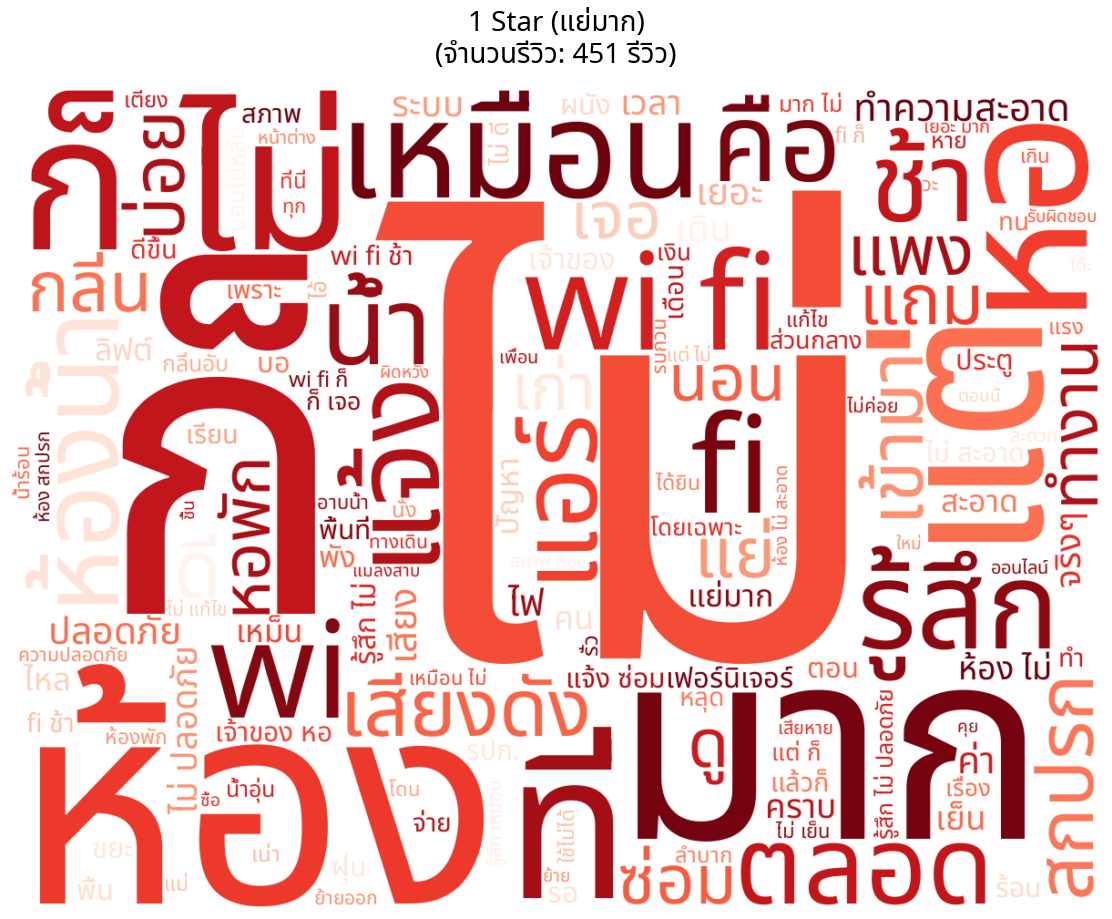

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö 1.0 ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images\wordclouds\ngram_word_cloud_1.0_star.png


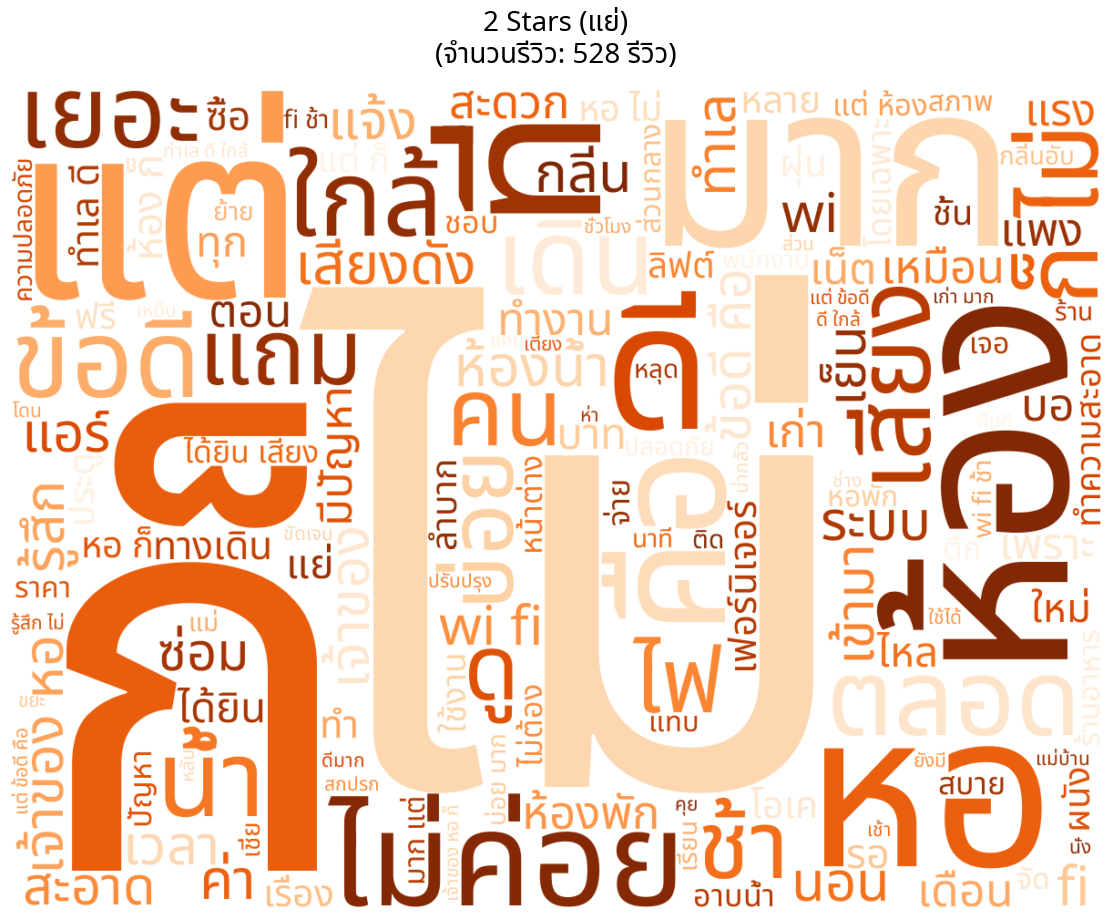

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö 2.0 ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images\wordclouds\ngram_word_cloud_2.0_star.png


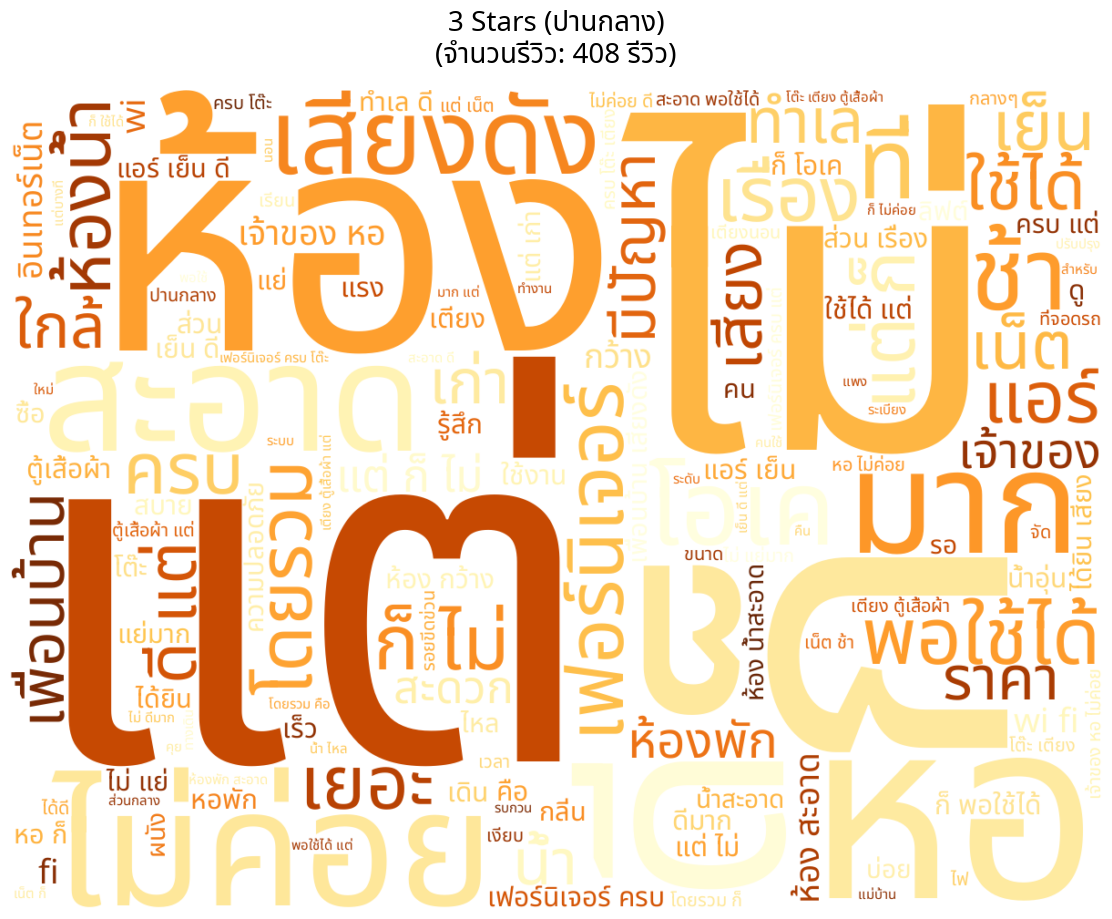

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö 3.0 ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images\wordclouds\ngram_word_cloud_3.0_star.png


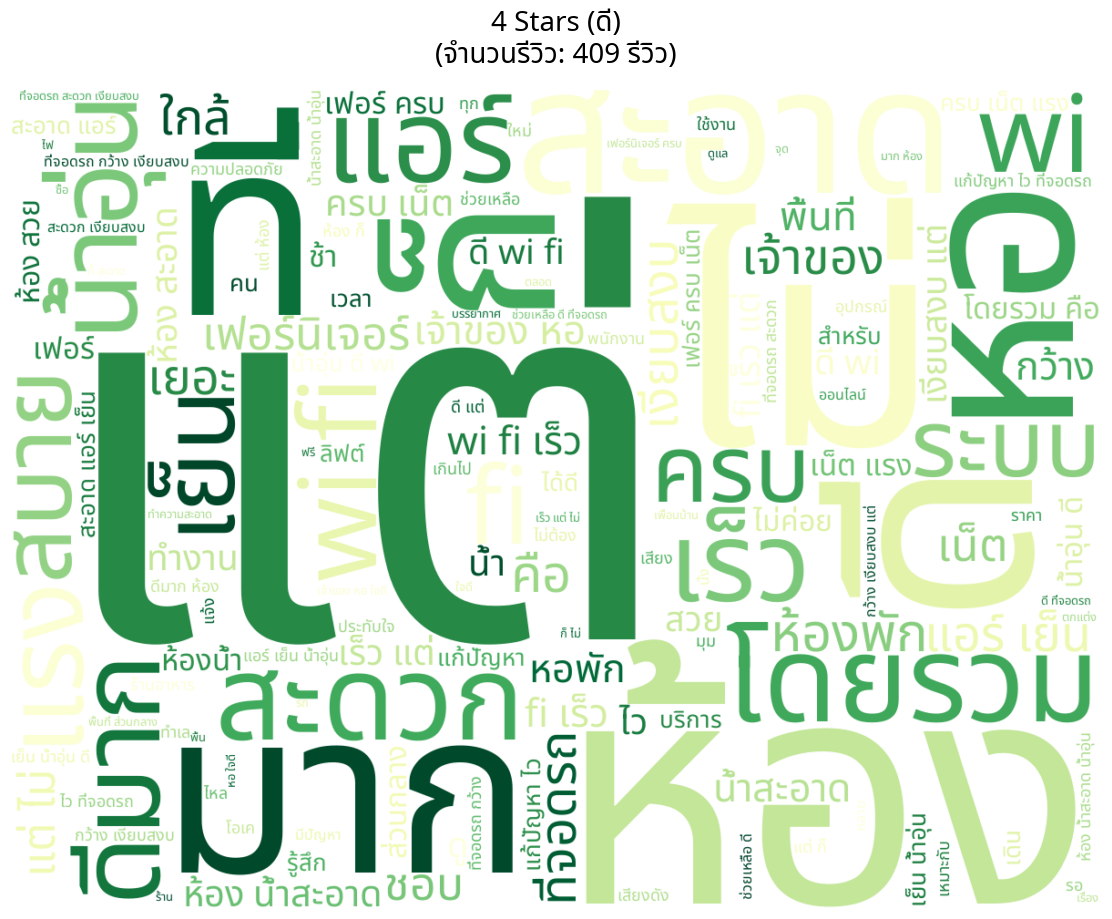

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö 4.0 ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images\wordclouds\ngram_word_cloud_4.0_star.png


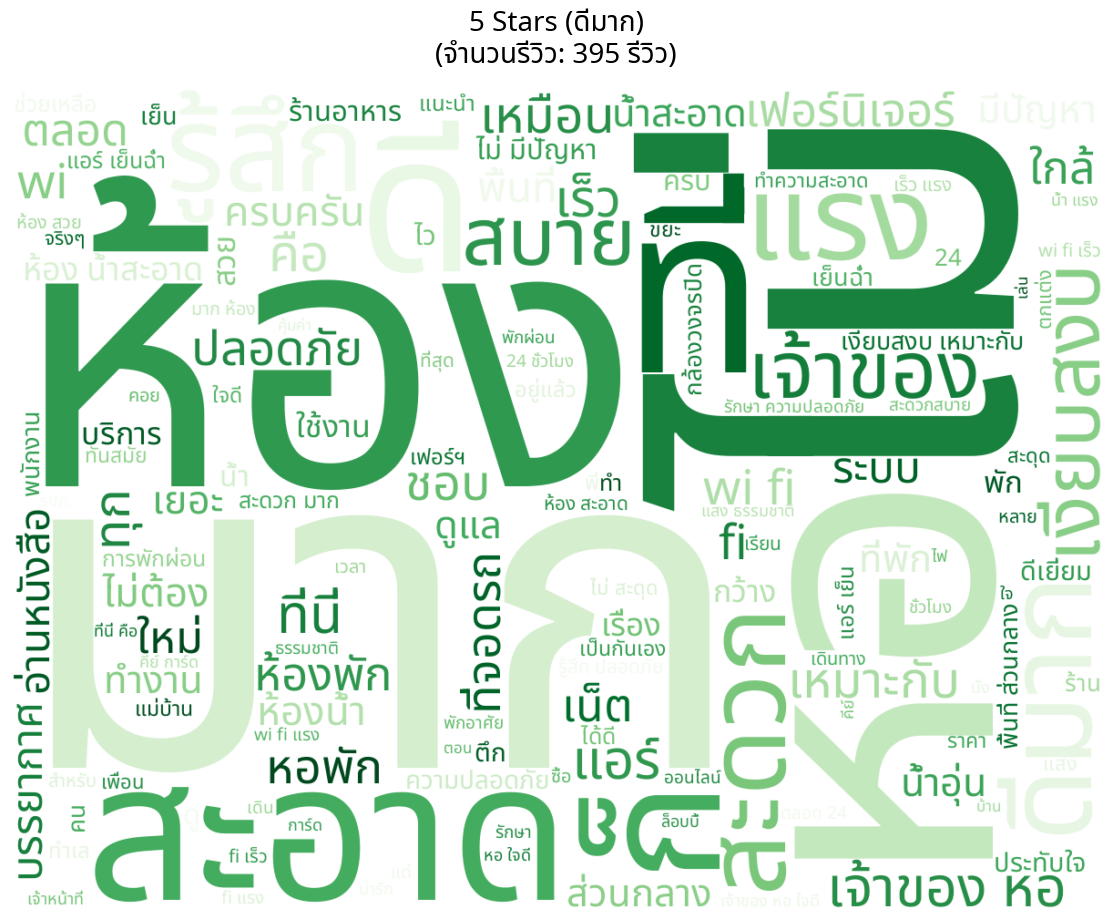

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö 5.0 ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: C:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\images\wordclouds\ngram_word_cloud_5.0_star.png

‡∏Ñ‡∏≥‡πÅ‡∏•‡∏∞‡∏ß‡∏•‡∏µ‡∏ó‡∏µ‡πà‡∏û‡∏ö‡∏ö‡πà‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î 15 ‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô

‚≠ê 1 Star (‡πÅ‡∏¢‡πà‡∏°‡∏≤‡∏Å)


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö       ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
0        1      ‡πÑ‡∏°‡πà      732
1        2       ‡∏Å‡πá      392
2        3     ‡∏´‡πâ‡∏≠‡∏á      286
3        4      ‡∏°‡∏≤‡∏Å      249
4        5      ‡πÅ‡∏ï‡πà      138
5        6      ‡∏ó‡∏µ‡πà      131
6        7   ‡∏Å‡πá ‡πÑ‡∏°‡πà      112
7        8       ‡∏´‡∏≠      107
8        9   ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô      105
9       10       wi      104
10      11       fi      104
11      12    wi fi      104
12      13   ‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å       84
13      14     ‡πÅ‡∏à‡πâ‡∏á       83
14      15  ‡∏´‡πâ‡∏≠‡∏á‡∏ô‡πâ‡∏≥       69



‚≠ê 2 Stars (‡πÅ‡∏¢‡πà)


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö       ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
0        1      ‡πÑ‡∏°‡πà      692
1        2       ‡∏Å‡πá      576
2        3      ‡πÅ‡∏ï‡πà      451
3        4      ‡∏°‡∏≤‡∏Å      396
4        5     ‡∏´‡πâ‡∏≠‡∏á      387
5        6       ‡∏´‡∏≠      347
6        7      ‡∏ó‡∏µ‡πà      301
7        8       ‡∏î‡∏µ      224
8        9      ‡∏Ñ‡∏∑‡∏≠      177
9       10  ‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢      166
10      11    ‡∏Ç‡πâ‡∏≠‡∏î‡∏µ      108
11      12      ‡∏ô‡πâ‡∏≥      102
12      13     ‡πÉ‡∏Å‡∏•‡πâ      102
13      14     ‡∏ï‡∏•‡∏≠‡∏î      102
14      15    ‡πÄ‡∏™‡∏µ‡∏¢‡∏á      101



‚≠ê 3 Stars (‡∏õ‡∏≤‡∏ô‡∏Å‡∏•‡∏≤‡∏á)


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö            ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
0        1           ‡πÅ‡∏ï‡πà      591
1        2            ‡∏Å‡πá      471
2        3           ‡πÑ‡∏°‡πà      424
3        4          ‡∏´‡πâ‡∏≠‡∏á      295
4        5            ‡∏î‡∏µ      217
5        6            ‡∏´‡∏≠      189
6        7       ‡πÑ‡∏°‡πà‡∏Ñ‡πà‡∏≠‡∏¢      154
7        8         ‡∏™‡∏∞‡∏≠‡∏≤‡∏î      134
8        9           ‡∏°‡∏≤‡∏Å      120
9       10      ‡πÄ‡∏™‡∏µ‡∏¢‡∏á‡∏î‡∏±‡∏á      102
10      11          ‡πÇ‡∏≠‡πÄ‡∏Ñ      101
11      12           ‡∏ä‡πâ‡∏≤       96
12      13           ‡∏ó‡∏µ‡πà       89
13      14      ‡∏û‡∏≠‡πÉ‡∏ä‡πâ‡πÑ‡∏î‡πâ       88
14      15  ‡πÄ‡∏ü‡∏≠‡∏£‡πå‡∏ô‡∏¥‡πÄ‡∏à‡∏≠‡∏£‡πå       87



‚≠ê 4 Stars (‡∏î‡∏µ)


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö       ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
0        1      ‡πÅ‡∏ï‡πà      392
1        2     ‡∏´‡πâ‡∏≠‡∏á      336
2        3      ‡πÑ‡∏°‡πà      290
3        4       ‡∏î‡∏µ      246
4        5      ‡∏ó‡∏µ‡πà      199
5        6      ‡∏°‡∏≤‡∏Å      171
6        7       ‡∏´‡∏≠      162
7        8       ‡∏Å‡πá      145
8        9    ‡∏™‡∏∞‡∏≠‡∏≤‡∏î      129
9       10   ‡πÇ‡∏î‡∏¢‡∏£‡∏ß‡∏°      113
10      11    ‡∏™‡∏∞‡∏î‡∏ß‡∏Å      110
11      12     ‡πÅ‡∏≠‡∏£‡πå      107
12      13    ‡∏î‡∏µ‡∏°‡∏≤‡∏Å      101
13      14  ‡∏ô‡πâ‡∏≥‡∏≠‡∏∏‡πà‡∏ô       99
14      15     ‡πÄ‡∏£‡πá‡∏ß       97



‚≠ê 5 Stars (‡∏î‡∏µ‡∏°‡∏≤‡∏Å)


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö        ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
0        1       ‡∏°‡∏≤‡∏Å      204
1        2       ‡πÑ‡∏°‡πà      201
2        3      ‡∏´‡πâ‡∏≠‡∏á      188
3        4        ‡∏´‡∏≠      180
4        5       ‡∏ó‡∏µ‡πà      176
5        6     ‡∏™‡∏∞‡∏≠‡∏≤‡∏î      113
6        7        ‡∏î‡∏µ      111
7        8        ‡∏Å‡πá       82
8        9    ‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å       78
9       10     ‡∏î‡∏µ‡∏°‡∏≤‡∏Å       77
10      11       ‡πÅ‡∏£‡∏á       76
11      12     ‡∏™‡∏∞‡∏î‡∏ß‡∏Å       66
12      13   ‡πÄ‡∏à‡πâ‡∏≤‡∏Ç‡∏≠‡∏á       66
13      14      ‡∏™‡∏ö‡∏≤‡∏¢       66
14      15  ‡πÄ‡∏á‡∏µ‡∏¢‡∏ö‡∏™‡∏á‡∏ö       64

In [12]:
# --- ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Word Cloud ‡πÅ‡∏¢‡∏Å‡πÑ‡∏ü‡∏•‡πå (‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ N-grams) ---
all_words_by_rating = {}
top_words_by_rating = {}

print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Word Cloud ‡πÅ‡∏¢‡∏Å‡∏ï‡∏≤‡∏°‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô...")

for rating in sorted(df['rating'].unique()):
    rating_texts = df[df['rating'] == rating]['cleaned_review'].tolist()
    combined_text = ' '.join(rating_texts)
    
    # 1. ‡∏ï‡∏±‡∏î‡∏Ñ‡∏≥ (Tokenize) ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÑ‡∏î‡πâ‡∏Ñ‡∏≥‡πÄ‡∏î‡∏µ‡πà‡∏¢‡∏ß (Unigrams)
    words = word_tokenize(combined_text, engine='newmm')
    words = [word.strip() for word in words if len(word.strip()) > 1]
    
    # 2. ‡∏™‡∏£‡πâ‡∏≤‡∏á Bigrams ‡πÅ‡∏•‡∏∞ Trigrams
    bigrams = [' '.join(gram) for gram in ngrams(words, 2)]
    trigrams = [' '.join(gram) for gram in ngrams(words, 3)]
    
    # 3. ‡∏£‡∏ß‡∏° tokens ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î (Unigrams + Bigrams + Trigrams)
    all_tokens = words + bigrams + trigrams
    
    # 4. ‡∏ô‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏à‡∏≤‡∏Å tokens ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
    word_freq = Counter(all_tokens)
    all_words_by_rating[rating] = word_freq
    top_words_by_rating[rating] = word_freq.most_common(15)
    
    if len(word_freq) > 0:
        wordcloud = WordCloud(
            font_path=THAI_FONT_PATH,
            width=1200, height=900, background_color='white',
            colormap=rating_colors[rating],
            max_words=150,
            # ‡πÄ‡∏û‡∏¥‡πà‡∏° collocations=False ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ WordCloud ‡πÑ‡∏°‡πà‡∏û‡∏¢‡∏≤‡∏¢‡∏≤‡∏°‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏Ñ‡∏≥‡πÄ‡∏≠‡∏á‡∏ã‡πâ‡∏≥‡∏ã‡πâ‡∏≠‡∏ô
            collocations=False, 
            relative_scaling=0.5, min_font_size=10
        ).generate_from_frequencies(word_freq)
        
        plt.figure(figsize=(12, 9))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{rating_names[rating]}\n(‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß: {len(rating_texts)} ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)', 
                  fontsize=20, fontweight='bold', pad=20)
        plt.axis('off')
        plt.tight_layout(pad=0)
        
        filename = f"ngram_word_cloud_{rating}_star.png"
        save_path = os.path.join(wordcloud_output_dir, filename)
        
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
        
        print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å N-gram Word Cloud ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö {rating} ‡∏î‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏µ‡πà: {save_path}")
    else:
        print(f"‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏™‡∏£‡πâ‡∏≤‡∏á Word Cloud ‡∏Ç‡∏≠‡∏á‡πÄ‡∏£‡∏ï‡∏ï‡∏¥‡πâ‡∏á {rating} ‡∏î‡∏≤‡∏ß")

print("\n‡∏Ñ‡∏≥‡πÅ‡∏•‡∏∞‡∏ß‡∏•‡∏µ‡∏ó‡∏µ‡πà‡∏û‡∏ö‡∏ö‡πà‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î 15 ‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô")
for rating in sorted(df['rating'].unique()):
    print(f"\n‚≠ê {rating_names[rating]}")
    print(f"{'='*80}")
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
    top_words_df = pd.DataFrame(
        top_words_by_rating[rating],
        columns=['‡∏Ñ‡∏≥', '‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà']
    )
    top_words_df.insert(0, '‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö', range(1, len(top_words_df) + 1))
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°‡πÉ‡∏ô Notebook
    display(top_words_df)
    print()

In [13]:
# --- ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å rating ---
print(f"\n{'='*100}")
print("üîç ‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô")
print(f"{'='*100}\n")

# ‡∏´‡∏≤‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å rating
common_words = set(all_words_by_rating[1].keys())
for rating in range(2, 6):
    if rating in all_words_by_rating:
        common_words = common_words.intersection(set(all_words_by_rating[rating].keys()))

# ‡∏ô‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏£‡∏ß‡∏°‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å rating
common_word_freq = Counter()
for word in common_words:
    total_freq = sum(all_words_by_rating[rating][word] for rating in all_words_by_rating.keys())
    common_word_freq[word] = total_freq

# ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏à‡∏≤‡∏Å common_words ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
all_common_df = pd.DataFrame(common_word_freq.items(), columns=['‡∏Ñ‡∏≥', '‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏£‡∏ß‡∏°'])
# ‡∏à‡∏±‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏£‡∏ß‡∏°‡∏à‡∏≤‡∏Å‡∏°‡∏≤‡∏Å‡πÑ‡∏õ‡∏ô‡πâ‡∏≠‡∏¢
all_common_df = all_common_df.sort_values(by='‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏£‡∏ß‡∏°', ascending=False).reset_index(drop=True)
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå '‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö'
all_common_df.insert(0, '‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö', range(1, len(all_common_df) + 1))

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
print(f"üìã ‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡∏ö‡πà‡∏≠‡∏¢‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î ({len(all_common_df)} ‡∏Ñ‡∏≥):")
# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°‡πÉ‡∏ô Notebook
display(all_common_df)


üîç ‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô

üìã ‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏û‡∏ö‡∏ö‡πà‡∏≠‡∏¢‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡∏£‡∏∞‡∏î‡∏±‡∏ö‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î (541 ‡∏Ñ‡∏≥):


‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö                   ‡∏Ñ‡∏≥  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏£‡∏ß‡∏°
0         1                  ‡πÑ‡∏°‡πà        2339
1         2                   ‡∏Å‡πá        1666
2         3                  ‡πÅ‡∏ï‡πà        1588
3         4                 ‡∏´‡πâ‡∏≠‡∏á        1492
4         5                  ‡∏°‡∏≤‡∏Å        1140
..      ...                  ...         ...
536     537              ‡∏î‡∏µ ‡∏Ñ‡∏µ‡∏¢‡πå           6
537     538         ‡πÅ‡∏à‡πâ‡∏á ‡∏ã‡πà‡∏≠‡∏° ‡πÅ‡∏≠           6
538     539              ‡∏ã‡πà‡∏≠‡∏° ‡πÅ‡∏≠           6
539     540  ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢ ‡∏î‡∏µ ‡∏Ñ‡∏µ‡∏¢‡πå           5
540     541               ‡∏Å‡πá ‡πÅ‡∏£‡∏á           5

[541 rows x 3 columns]

In [14]:
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÇ‡∏Ñ‡πâ‡∏î‡∏ô‡∏µ‡πâ‡∏´‡∏•‡∏±‡∏á‡∏à‡∏≤‡∏Å Section 5 (Data Cleaning)
print("\n" + "="*100)
print("‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÅ‡∏•‡∏∞‡∏´‡∏•‡∏±‡∏á‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î (Text Preprocessing)")
print("="*100)

# ‡πÅ‡∏™‡∏î‡∏á 5 ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÅ‡∏£‡∏Å
sample_df = df.head(10).copy()
comparison_df = pd.DataFrame({
    'Rating': sample_df['rating'],
    '‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏î‡∏¥‡∏°': sample_df['text'].str[:80] + '...',
    '‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏±‡∏á Cleaning': sample_df['cleaned_review'].str[:80] + '...',
    '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥': sample_df['word_count']
})

display(comparison_df)


‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡πÅ‡∏•‡∏∞‡∏´‡∏•‡∏±‡∏á‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î (Text Preprocessing)


Rating                                        ‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏î‡∏¥‡∏°  \
0     5.0  ‡∏≠‡∏¢‡∏π‡πà‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πà‡∏°‡∏≤‡∏à‡∏∞‡∏Ñ‡∏£‡∏ö‡∏õ‡∏µ‡πÅ‡∏•‡πâ‡∏ß‡∏Ñ‡πà‡∏∞ ‡∏õ‡∏£‡∏∞‡∏ó‡∏±‡∏ö‡πÉ‡∏à‡∏°‡∏≤‡∏Å ‡∏´‡∏≠‡πÄ‡∏á‡∏µ‡∏¢‡∏ö...   
1     5.0  ‡∏´‡∏≠‡∏Ñ‡∏∑‡∏≠‡∏î‡∏µ‡∏°‡∏≤‡∏Å‡πÅ‡∏ö‡∏ö 10/10 ‡πÑ‡∏°‡πà‡∏´‡∏±‡∏Å ‡∏´‡πâ‡∏≠‡∏á‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡πÑ‡∏°‡πà‡∏à...   
2     5.0  ‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏¢‡πá‡∏ô‡∏ô‡πâ‡∏≥‡πÅ‡∏£‡∏á ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏≠‡∏∞‡πÑ‡∏£‡πÉ‡∏´‡πâ‡∏ö‡πà‡∏ô‡πÄ‡∏•‡∏¢‡∏à‡∏£‡∏¥‡∏á‡πÜ ‡∏≠‡∏¢‡∏π‡πà‡∏°‡∏≤‡∏à...   
3     5.0  ‡∏ä‡∏≠‡∏ö‡∏ï‡∏£‡∏á‡∏ó‡∏µ‡πà‡∏°‡∏µ working space ‡πÉ‡∏´‡∏ç‡πà‡πÜ ‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á ‡∏ô‡∏±‡πà‡∏á‡∏ó...   
4     5.0  ‡∏´‡πâ‡∏≠‡∏á‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏ó‡∏∏‡∏Å‡∏°‡∏∏‡∏° ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô‡∏°‡∏≤‡∏ó‡∏∏‡∏Å‡∏≠‡∏≤‡∏ó‡∏¥‡∏ï‡∏¢‡πå ‡πÄ‡∏à‡πâ‡∏≤‡∏Ç‡∏≠‡∏á‡∏´‡∏≠‡∏û...   
5     5.0  ‡∏≠‡∏¢‡∏π‡πà‡∏°‡∏≤‡πÄ‡∏Å‡∏∑‡∏≠‡∏ö‡∏™‡∏≠‡∏á‡∏õ‡∏µ‡πÅ‡∏•‡πâ‡∏ß ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡∏≠‡∏∞‡πÑ‡∏£‡πÄ‡∏•‡∏¢ ‡∏ô‡πâ‡∏≥‡πÑ...   
6     5.0  ‡∏£‡∏∞‡∏ö‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢‡∏î‡∏µ‡∏°‡∏≤‡∏Å ‡∏Å‡∏•‡πâ‡∏≠‡∏á‡∏ß‡∏á‡∏à‡∏£‡∏õ‡∏¥‡∏î‡∏ä‡∏±‡∏î‡πÄ‡∏ß‡∏≠‡∏£‡πå ‡∏ï‡∏≠‡∏ô‡∏Ç...   
7     5.0  ‡∏´‡∏≠‡∏ô‡∏µ‡πâ‡∏°‡∏µ‡∏ü‡∏¥‡∏ï‡πÄ‡∏ô‡∏™‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ‡∏ü‡∏£‡∏µ‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞ ‡πÄ‡∏≠‡∏≤‡πÑ‡∏ß‡πâ‡πÄ‡∏•‡πà...   
8     5.0  ‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πà‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö‡∏Ñ‡∏ô‡∏ó‡∏µ‡πà‡∏ä‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏á‡∏ö ‡πÑ‡∏°‡πà‡∏ß‡∏∏‡πà‡∏ô‡∏ß‡∏≤‡∏¢ ‡∏´‡πâ‡∏≠‡∏á‡∏°...   
9     5.0  ‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ô‡∏±‡∏Å‡∏®‡∏∂‡∏Å‡∏©‡∏≤‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏≠‡∏¢‡∏≤‡∏Å‡πÄ‡∏´‡∏ô‡∏∑‡πà‡∏≠‡∏¢‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏´‡∏≠ ‡πÄ...   

                                ‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏´‡∏•‡∏±‡∏á Cleaning  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥  
0  ‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πà ‡∏Ñ‡∏£‡∏ö ‡∏õ‡∏µ   ‡∏õ‡∏£‡∏∞‡∏ó‡∏±‡∏ö‡πÉ‡∏à ‡∏°‡∏≤‡∏Å   ‡∏´‡∏≠ ‡πÄ‡∏á‡∏µ‡∏¢‡∏ö‡∏™‡∏á‡∏ö   ‡∏™...       71  
1  ‡∏´‡∏≠ ‡∏Ñ‡∏∑‡∏≠ ‡∏î‡∏µ‡∏°‡∏≤‡∏Å   10   10   ‡πÑ‡∏°‡πà ‡∏´‡∏±‡∏Å   ‡∏´‡πâ‡∏≠‡∏á ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô...       49  
2  ‡πÅ‡∏≠‡∏£‡πå ‡πÄ‡∏¢‡πá‡∏ô ‡∏ô‡πâ‡∏≥ ‡πÅ‡∏£‡∏á   ‡πÑ‡∏°‡πà ‡∏ö‡πà‡∏ô ‡∏à‡∏£‡∏¥‡∏á‡πÜ     3   ‡πÄ‡∏ó‡∏≠‡∏°...       29  
3  ‡∏ä‡∏≠‡∏ö ‡∏ó‡∏µ‡πà   working   space     ‡∏î‡πâ‡∏≤‡∏ô‡∏•‡πà‡∏≤‡∏á   ‡∏ô‡∏±‡πà‡∏á ...       33  
4  ‡∏´‡πâ‡∏≠‡∏á ‡∏™‡∏∞‡∏≠‡∏≤‡∏î ‡∏ó‡∏∏‡∏Å ‡∏°‡∏∏‡∏°   ‡πÅ‡∏°‡πà‡∏ö‡πâ‡∏≤‡∏ô ‡∏ó‡∏∏‡∏Å ‡∏≠‡∏≤‡∏ó‡∏¥‡∏ï‡∏¢‡πå   ‡πÄ‡∏à‡πâ...       57  
5  ‡∏™‡∏≠‡∏á ‡∏õ‡∏µ   ‡πÑ‡∏°‡πà ‡∏°‡∏µ‡∏õ‡∏±‡∏ç‡∏´‡∏≤   ‡∏ô‡πâ‡∏≥ ‡πÑ‡∏°‡πà   ‡πÑ‡∏ü ‡πÑ‡∏°‡πà ‡∏î‡∏±‡∏ö   ...       31  
6  ‡∏£‡∏∞‡∏ö‡∏ö ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢ ‡∏î‡∏µ‡∏°‡∏≤‡∏Å   ‡∏Å‡∏•‡πâ‡∏≠‡∏á‡∏ß‡∏á‡∏à‡∏£‡∏õ‡∏¥‡∏î ‡∏ä‡∏±‡∏î ‡πÄ‡∏ß‡∏≠‡∏£...       23  
7  ‡∏´‡∏≠ ‡∏ü‡∏¥‡∏ï‡πÄ‡∏ô‡∏™ ‡∏Ç‡∏ô‡∏≤‡∏î‡πÄ‡∏•‡πá‡∏Å ‡∏ü‡∏£‡∏µ   ‡πÄ‡∏≠‡∏≤‡πÑ‡∏ß‡πâ ‡πÄ‡∏•‡πà‡∏ô ‡πÄ‡∏ö‡∏≤   ‡∏ô‡∏≠‡∏ô...       29  
8  ‡∏ó‡∏µ‡πà‡∏ô‡∏µ‡πà ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏Å‡∏±‡∏ö ‡∏Ñ‡∏ô ‡∏ó‡∏µ‡πà ‡∏ä‡∏≠‡∏ö ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏á‡∏ö   ‡πÑ‡∏°‡πà ‡∏ß‡∏∏‡πà‡∏ô‡∏ß...       39  
9  ‡πÅ‡∏ô‡∏∞‡∏ô‡∏≥ ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏ô‡∏±‡∏Å‡∏®‡∏∂‡∏Å‡∏©‡∏≤ ‡∏ó‡∏µ‡πà ‡πÑ‡∏°‡πà ‡πÄ‡∏´‡∏ô‡∏∑‡πà‡∏≠‡∏¢ ‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á ‡∏´...       39

## **6. Split Data**


In [15]:
# ‡πÅ‡∏ö‡πà‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏õ‡πá‡∏ô train ‡πÅ‡∏•‡∏∞ test set (80/20) ‡πÇ‡∏î‡∏¢ stratify ‡∏ï‡∏≤‡∏° rating
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_columns],
    df['rating'],
    test_size=0.2,
    random_state=42,
    stratify=df['rating']
)

# ‡∏û‡∏¥‡∏°‡∏û‡πå‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• train ‡πÅ‡∏•‡∏∞ test
print(f"‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ù‡∏∂‡∏Å‡∏ù‡∏ô: {len(X_train)}")
print(f"‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏î‡∏™‡∏≠‡∏ö: {len(X_test)}")

‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ù‡∏∂‡∏Å‡∏ù‡∏ô: 1752
‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏î‡∏™‡∏≠‡∏ö: 439


In [16]:
# ‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏•‡∏≥‡∏î‡∏±‡∏ö rating ‡∏ó‡∏µ‡πà unique
rating_order = sorted(df['rating'].unique())
# ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÉ‡∏ô train set
train_counts = y_train.value_counts().reindex(rating_order, fill_value=0).tolist()
# ‡∏ô‡∏±‡∏ö‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÉ‡∏ô test set
test_counts = y_test.value_counts().reindex(rating_order, fill_value=0).tolist()
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏ß‡∏°
total_counts = [train + test for train, test in zip(train_counts, test_counts)]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ï‡∏≤‡∏£‡∏≤‡∏á
table_data = {
    '‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô': rating_order,
    '‡∏ä‡∏∏‡∏î‡∏ù‡∏∂‡∏Å (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)': train_counts,
    '‡∏ä‡∏∏‡∏î‡∏ó‡∏î‡∏™‡∏≠‡∏ö (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)': test_counts,
    '‡∏£‡∏ß‡∏° (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)': total_counts
}
table = pd.DataFrame(table_data)

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÅ‡∏ñ‡∏ß‡∏£‡∏ß‡∏°
table.loc['‡∏£‡∏ß‡∏°'] = ['‡∏£‡∏ß‡∏°', sum(train_counts), sum(test_counts), sum(total_counts)]

# ‡∏û‡∏¥‡∏°‡∏û‡πå‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô
print("\n‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÉ‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ù‡∏∂‡∏Å‡πÅ‡∏•‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö")
print(table.to_string(index=False))


‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡πÉ‡∏ô‡∏ä‡∏∏‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ù‡∏∂‡∏Å‡πÅ‡∏•‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö
‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô  ‡∏ä‡∏∏‡∏î‡∏ù‡∏∂‡∏Å (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)  ‡∏ä‡∏∏‡∏î‡∏ó‡∏î‡∏™‡∏≠‡∏ö (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)  ‡∏£‡∏ß‡∏° (‡∏£‡∏µ‡∏ß‡∏¥‡∏ß)
  1.0             361                90          451
  2.0             422               106          528
  3.0             326                82          408
  4.0             327                82          409
  5.0             316                79          395
  ‡∏£‡∏ß‡∏°            1752               439         2191


## **7. Create Feature Vectors**


In [17]:
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î tokenizer ‡πÅ‡∏ö‡∏ö‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÄ‡∏≠‡∏á‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ word_tokenize
from utils import custom_tokenizer

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå Thai2fit ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö train set
X_train_vectors = np.array([enhanced_sentence_vectorizer(text) for text in X_train['cleaned_review']])
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå Thai2fit ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö test set
X_test_vectors = np.array([enhanced_sentence_vectorizer(text) for text in X_test['cleaned_review']])

# ‡∏™‡∏£‡πâ‡∏≤‡∏á TF-IDF vectorizer ‡∏î‡πâ‡∏ß‡∏¢‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î
tfidf_vectorizer = TfidfVectorizer( 
    tokenizer=custom_tokenizer,
    max_features=10000,
    ngram_range=(1, 3),
    min_df=2, max_df=0.85,
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á CountVectorizer ‡∏î‡πâ‡∏ß‡∏¢‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏Å‡∏≥‡∏´‡∏ô‡∏î
count_vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    max_features=3000,
    ngram_range=(1, 2),
    min_df=3, max_df=0.85
)

# Fit ‡πÅ‡∏•‡∏∞ transform TF-IDF ‡∏ö‡∏ô train set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['cleaned_review'])
# Transform TF-IDF ‡∏ö‡∏ô test set
X_test_tfidf = tfidf_vectorizer.transform(X_test['cleaned_review'])

# Fit ‡πÅ‡∏•‡∏∞ transform CountVectorizer ‡∏ö‡∏ô train set
X_train_count = count_vectorizer.fit_transform(X_train['cleaned_review'])
# Transform CountVectorizer ‡∏ö‡∏ô test set
X_test_count = count_vectorizer.transform(X_test['cleaned_review'])

# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå Thai2fit ‡πÄ‡∏õ‡πá‡∏ô sparse matrix
X_train_vectors_sparse = csr_matrix(X_train_vectors)
X_test_vectors_sparse = csr_matrix(X_test_vectors)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á scaler ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå (with_mean=False ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö sparse)
scaler = StandardScaler(with_mean=False)
# Fit ‡πÅ‡∏•‡∏∞ transform scaler ‡∏ö‡∏ô train vectors
X_train_vectors_scaled = scaler.fit_transform(X_train_vectors_sparse)
# Transform scaler ‡∏ö‡∏ô test vectors
X_test_vectors_scaled = scaler.transform(X_test_vectors_sparse)

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå numerical features
numerical_features = [col for col in feature_columns if col != 'cleaned_review']
# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô array ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö train
X_train_additional = X_train[numerical_features].values
# ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô array ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö test
X_test_additional = X_test[numerical_features].values

# ‡∏™‡∏£‡πâ‡∏≤‡∏á scaler ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö features ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
features_scaler = StandardScaler()
# Fit ‡πÅ‡∏•‡∏∞ transform ‡∏ö‡∏ô train additional
X_train_additional_scaled = features_scaler.fit_transform(X_train_additional)
# Transform ‡∏ö‡∏ô test additional
X_test_additional_scaled = features_scaler.transform(X_test_additional)

c:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
# ‡∏û‡∏¥‡∏°‡∏û‡πå‡∏à‡∏≥‡∏ô‡∏ß‡∏ô features ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó
print(f"TF-IDF features: {X_train_tfidf.shape[1]}")
print(f"Count features: {X_train_count.shape[1]}")
print(f"Thai2fit features: {X_train_vectors.shape[1]}")
print(f"Additional features: {X_train_additional.shape[1]}")
print(f"Total features: {X_train_tfidf.shape[1] + X_train_count.shape[1] + X_train_vectors.shape[1] + X_train_additional.shape[1]}")

TF-IDF features: 10000
Count features: 3000
Thai2fit features: 300
Additional features: 10
Total features: 13310


## **8. Combine All Features**


In [19]:
# ‡∏£‡∏ß‡∏° features ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö train set ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ hstack
X_train_combined = hstack([
    X_train_tfidf,         # TF-IDF features
    X_train_count,         # Count vectors
    X_train_vectors_scaled, # Thai2fit embeddings
    csr_matrix(X_train_additional_scaled) # ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
])

# ‡∏£‡∏ß‡∏° features ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö test set ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ hstack
X_test_combined = hstack([
    X_test_tfidf,
    X_test_count,
    X_test_vectors_scaled,
    csr_matrix(X_test_additional_scaled)
])

# ‡∏™‡∏£‡πâ‡∏≤‡∏á features ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MultinomialNB (‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞ TF-IDF ‡πÅ‡∏•‡∏∞ Count vectors ‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡∏ö‡∏ß‡∏Å)
X_train_nb = hstack([X_train_tfidf, X_train_count])
X_test_nb = hstack([X_test_tfidf, X_test_count])

print(f"‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á features ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MultinomialNB - train: {X_train_nb.shape}, test: {X_test_nb.shape}")

# ‡∏û‡∏¥‡∏°‡∏û‡πå‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á features ‡∏£‡∏ß‡∏°
print(f"‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á features ‡∏£‡∏ß‡∏° - train: {X_train_combined.shape}, test: {X_test_combined.shape}")

‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á features ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MultinomialNB - train: (1752, 13000), test: (439, 13000)
‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á features ‡∏£‡∏ß‡∏° - train: (1752, 13310), test: (439, 13310)


## **9. Train Model**


In [20]:
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î dictionary ‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ï‡πà‡∏≤‡∏á‡πÜ ‡∏î‡πâ‡∏ß‡∏¢‡∏û‡∏≤‡∏£‡∏≤‡∏°‡∏¥‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á
models = {
    'Logistic Regression': LogisticRegression(
        C=0.15,                     # ‡∏Ñ‡πà‡∏≤ regularization parameter (0.15 ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏±‡πà‡∏ß‡πÑ‡∏õ‡∏°‡∏≤‡∏Å‡∏Ç‡∏∂‡πâ‡∏ô)
        class_weight='balanced',    # ‡∏ä‡πà‡∏ß‡∏¢‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Å‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏™‡∏°‡∏î‡∏∏‡∏•
        penalty='l2',               # L2 regularization ‡∏ä‡πà‡∏ß‡∏¢‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô overfitting
        solver='saga',              # ‡∏≠‡∏±‡∏•‡∏Å‡∏≠‡∏£‡∏¥‡∏ó‡∏∂‡∏°‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏î‡∏µ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡∏ç‡πà
        tol=0.0001,                 # ‡πÄ‡∏Å‡∏ì‡∏ë‡πå‡∏Å‡∏≤‡∏£‡∏´‡∏¢‡∏∏‡∏î
        max_iter=1000,              # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å
        random_state=42,            # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡πà‡∏≤ random seed
        multi_class='multinomial',  # ‡πÄ‡∏õ‡πá‡∏ô‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏≥‡πÅ‡∏ô‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡∏Ñ‡∏•‡∏≤‡∏™ (multiclass)
        n_jobs=-1                   # ‡πÉ‡∏ä‡πâ‡∏ó‡∏∏‡∏Å CPU cores
    ),
    'Multinomial Naive Bayes': MultinomialNB(
        alpha=0.1,  # Smoothing parameter ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô zero probability
        fit_prior=True  # ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡∏£‡∏π‡πâ prior probabilities ‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,  # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡πÉ‡∏ô forest
        max_depth=10,  # ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏∂‡∏Å‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡∏Ç‡∏≠‡∏á‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô overfitting
        min_samples_split=5,  # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡πà‡∏≥‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÅ‡∏¢‡∏Å‡πÇ‡∏´‡∏ô‡∏î
        min_samples_leaf=2,  # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡πà‡∏≥‡πÉ‡∏ô leaf node
        random_state=42,  # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î random seed
        n_jobs=-1  # ‡πÉ‡∏ä‡πâ‡∏ó‡∏∏‡∏Å CPU cores
    )
}



## **10. Evaluate Model**



‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å Logistic Regression...


c:\Users\Phutawan Chonsakorn\Downloads\Roomaroo_TextClassification\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
‡πÄ‡∏ß‡∏•‡∏≤‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å: 11.34 ‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ
Model Accuracy: 0.7722
Features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ: 13310 features

Classification Report:
              precision    recall  f1-score   support

         1.0       0.77      0.91      0.84        90
         2.0       0.82      0.77      0.80       106
         3.0       0.78      0.73      0.75        82
         4.0       0.74      0.61      0.67        82
         5.0       0.74      0.82      0.78        79

    accuracy                           0.77       439
   macro avg       0.77      0.77      0.77       439
weighted avg       0.77      0.77      0.77       439



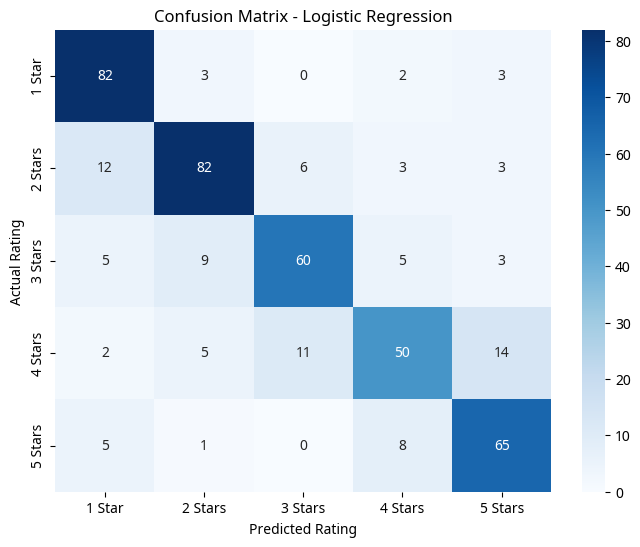


‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å Multinomial Naive Bayes...

Multinomial Naive Bayes
‡πÄ‡∏ß‡∏•‡∏≤‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å: 0.01 ‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ
Model Accuracy: 0.7654
Features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ: 13000 features

Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.84      0.83        90
         2.0       0.72      0.79      0.76       106
         3.0       0.74      0.78      0.76        82
         4.0       0.69      0.61      0.65        82
         5.0       0.87      0.78      0.83        79

    accuracy                           0.77       439
   macro avg       0.77      0.76      0.76       439
weighted avg       0.77      0.77      0.76       439



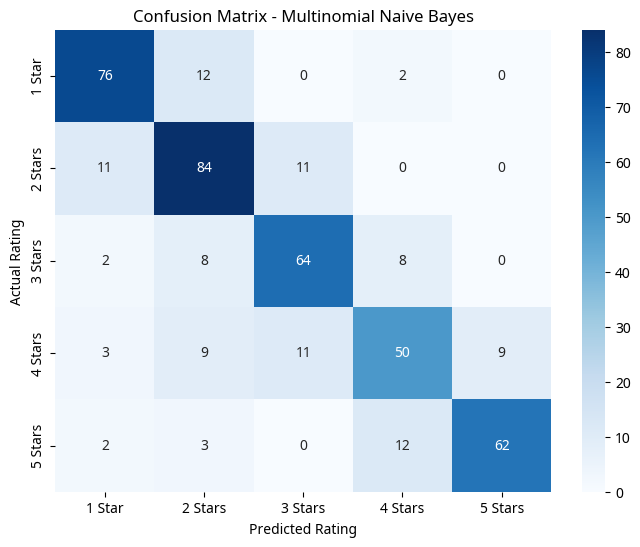


‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å Random Forest...

Random Forest
‡πÄ‡∏ß‡∏•‡∏≤‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å: 0.28 ‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ
Model Accuracy: 0.7221
Features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ: 13310 features

Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.89      0.77        90
         2.0       0.75      0.69      0.72       106
         3.0       0.79      0.66      0.72        82
         4.0       0.84      0.57      0.68        82
         5.0       0.64      0.80      0.71        79

    accuracy                           0.72       439
   macro avg       0.74      0.72      0.72       439
weighted avg       0.74      0.72      0.72       439



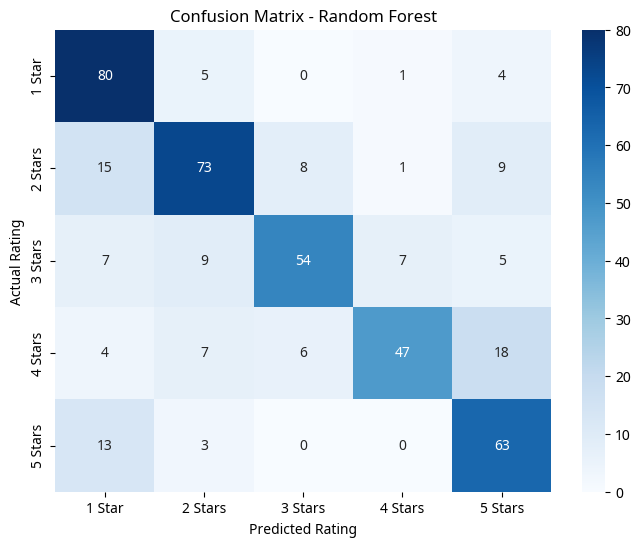

In [21]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á dictionary ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
results = {}

# ‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ù‡∏∂‡∏Å {name}...")
    print(f"{'='*60}")
    
    # ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏à‡∏±‡∏ö‡πÄ‡∏ß‡∏•‡∏≤ training
    start_time = time.time()
    
    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å features ‡∏ï‡∏≤‡∏°‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡πÇ‡∏°‡πÄ‡∏î‡∏•
    if name == 'Multinomial Naive Bayes':
        # ‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞ TF-IDF ‡πÅ‡∏•‡∏∞ Count vectors ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MultinomialNB
        X_train_model = X_train_nb
        X_test_model = X_test_nb
    else:
        # ‡πÉ‡∏ä‡πâ features ‡∏Ñ‡∏£‡∏ö‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏≠‡∏∑‡πà‡∏ô
        X_train_model = X_train_combined
        X_test_model = X_test_combined
    
    # ‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏î‡πâ‡∏ß‡∏¢ train set
    model.fit(X_train_model, y_train)
    
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÄ‡∏ß‡∏•‡∏≤‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ training
    training_time = time.time() - start_time
    
    # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ö‡∏ô test set
    y_pred = model.predict(X_test_model)
    
    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÉ‡∏ô dictionary
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'training_time': training_time,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'X_train': X_train_model,  # ‡πÄ‡∏Å‡πá‡∏ö features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ù‡∏∂‡∏Å
        'X_test': X_test_model     # ‡πÄ‡∏Å‡πá‡∏ö features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ó‡∏î‡∏™‡∏≠‡∏ö
    }
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
    print(f"\n{name}")
    print(f"‡πÄ‡∏ß‡∏•‡∏≤‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å: {training_time:.2f} ‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Features ‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ: {X_train_model.shape[1]} features")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏û‡∏•‡πá‡∏≠‡∏ï confusion matrix (‡πÉ‡∏ä‡πâ‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡πÅ‡∏ó‡∏ô emoji ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÅ‡∏Å‡πâ‡∏õ‡∏±‡∏ç‡∏´‡∏≤ font)
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'],
                yticklabels=['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'])
    plt.xlabel("Predicted Rating")
    plt.ylabel("Actual Rating")
    plt.title(f"Confusion Matrix - {name}")
    
    filename = f"{name.replace(' ', '_')}_confusion_matrix.png"
    save_path = os.path.join(model_output_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()



In [22]:
# ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
print(f"\n{'='*80}")
print("üìà ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î")
print(f"{'='*80}")

comparison_data = []
for name, result in results.items():
    comparison_data.append({
        '‡πÇ‡∏°‡πÄ‡∏î‡∏•': name,
        '‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥': f"{result['accuracy']:.4f}",
        '‡πÄ‡∏ß‡∏•‡∏≤‡∏ù‡∏∂‡∏Å (‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ)': f"{result['training_time']:.2f}",
        '‡∏à‡∏≥‡∏ô‡∏ß‡∏ô Features': result['X_train'].shape[1],
        'Macro Avg F1': f"{result['classification_report']['macro avg']['f1-score']:.4f}",
        'Weighted Avg F1': f"{result['classification_report']['weighted avg']['f1-score']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ‡∏´‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
print(f"\nüèÜ ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")

# ‡πÄ‡∏Å‡πá‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÑ‡∏ß‡πâ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô
best_model = results[best_model_name]['model']


üìà ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
                  ‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ ‡πÄ‡∏ß‡∏•‡∏≤‡∏ù‡∏∂‡∏Å (‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ)  ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô Features Macro Avg F1 Weighted Avg F1
    Logistic Regression     0.7722            11.34           13310       0.7665          0.7694
Multinomial Naive Bayes     0.7654             0.01           13000       0.7642          0.7645
          Random Forest     0.7221             0.28           13310       0.7188          0.7197

üèÜ ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î: Logistic Regression (Accuracy: 0.7722)


## **10.5 Analyze Misclassification Patterns**

In [33]:
## **10.5 ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡πÅ‡∏ö‡∏ö‡∏¢‡∏∑‡∏î‡∏´‡∏¢‡∏∏‡πà‡∏ô (‡πÄ‡∏ß‡∏≠‡∏£‡πå‡∏ä‡∏±‡∏ô‡∏¢‡πà‡∏≠)**

from collections import Counter
import pandas as pd

def analyze_specific_group(actual_rating, predicted_rating, y_true, y_pred, X_data):
    """
    ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡πÅ‡∏•‡∏∞‡∏Ñ‡∏∑‡∏ô‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡∏Ñ‡∏≥
    """
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á DataFrame ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå
    analysis_df = pd.DataFrame({
        '‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á': y_true.values,
        '‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢': y_pred,
        '‡∏£‡∏µ‡∏ß‡∏¥‡∏ß': X_data['cleaned_review'].values
    })
    
    # ‡∏Å‡∏£‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏°‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç
    target_data = analysis_df[
        (analysis_df['‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á'] == actual_rating) & 
        (analysis_df['‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢'] == predicted_rating)
    ]
    
    if len(target_data) == 0:
        return None, 0
    
    # ‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏Ñ‡∏≥‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÅ‡∏•‡∏∞‡∏ô‡∏±‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà
    all_words = []
    for review in target_data['‡∏£‡∏µ‡∏ß‡∏¥‡∏ß']:
        words = word_tokenize(review, engine='newmm')
        all_words.extend([w for w in words if len(w.strip()) > 1])
    
    word_freq = Counter(all_words)
    
    return word_freq, len(target_data)


def compare_common_words(actual_A, predicted_A, actual_B, predicted_B, 
                         y_true, y_pred, X_data, top_n=30):
    """
    ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°
    """
    
    print(f"\n{'#'*100}")
    print(f"‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°")
    print(f"{'#'*100}")
    
    # ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Å‡∏•‡∏∏‡πà‡∏° A
    freq_A, count_A = analyze_specific_group(
        actual_A, predicted_A, y_true, y_pred, X_data
    )
    
    if freq_A is None:
        print(f"\n‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° A (‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á {actual_A} -> ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ {predicted_A})")
        return
    
    # ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏Å‡∏•‡∏∏‡πà‡∏° B
    freq_B, count_B = analyze_specific_group(
        actual_B, predicted_B, y_true, y_pred, X_data
    )
    
    if freq_B is None:
        print(f"\n‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° B (‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á {actual_B} -> ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ {predicted_B})")
        return
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏Å‡∏•‡∏∏‡πà‡∏°
    group_A_name = f"‡∏à‡∏£‡∏¥‡∏á {actual_A}->‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ {predicted_A}"
    group_B_name = f"‡∏à‡∏£‡∏¥‡∏á {actual_B}->‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ {predicted_B}"
    status_A = "‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á" if actual_A == predicted_A else "‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î"
    status_B = "‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á" if actual_B == predicted_B else "‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î"
    
    print(f"\n‡∏Å‡∏•‡∏∏‡πà‡∏° A: {group_A_name} ({status_A}) - {count_A} ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß")
    print(f"‡∏Å‡∏•‡∏∏‡πà‡∏° B: {group_B_name} ({status_B}) - {count_B} ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß")
    
    # ‡∏´‡∏≤‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°
    common_words = set(freq_A.keys()) & set(freq_B.keys())
    
    if not common_words:
        print("\n‡πÑ‡∏°‡πà‡∏û‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°")
        return
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
    comparison_data = []
    
    for word in common_words:
        freq_a = freq_A[word]
        freq_b = freq_B[word]
        ratio_a_b = freq_a / freq_b if freq_b > 0 else float('inf')
        ratio_b_a = freq_b / freq_a if freq_a > 0 else float('inf')
        
        comparison_data.append({
            '‡∏Ñ‡∏≥': word,
            f'‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡πÉ‡∏ô A': freq_a,
            f'‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà‡πÉ‡∏ô B': freq_b,
            '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B': round(ratio_a_b, 2),
            '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A': round(ratio_b_a, 2),
            '‡∏ú‡∏•‡∏£‡∏ß‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà': freq_a + freq_b
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # ‡πÄ‡∏£‡∏µ‡∏¢‡∏á‡∏ï‡∏≤‡∏°‡∏ú‡∏•‡∏£‡∏ß‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà (‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡∏ö‡πà‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î)
    comparison_df = comparison_df.sort_values('‡∏ú‡∏•‡∏£‡∏ß‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà', ascending=False)
    comparison_df = comparison_df.head(top_n)
    comparison_df.insert(0, '‡∏≠‡∏±‡∏ô‡∏î‡∏±‡∏ö', range(1, len(comparison_df) + 1))
    
    print(f"\n{'='*120}")
    print(f"‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏° (Top {top_n})")
    print(f"{'='*120}")
    print(f"‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏:")
    print(f"  - ‡∏Å‡∏•‡∏∏‡πà‡∏° A: {group_A_name}")
    print(f"  - ‡∏Å‡∏•‡∏∏‡πà‡∏° B: {group_B_name}")
    print(f"  - ‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B > 1 ‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á ‡∏Ñ‡∏≥‡∏ô‡∏±‡πâ‡∏ô‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° A ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤")
    print(f"  - ‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A > 1 ‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á ‡∏Ñ‡∏≥‡∏ô‡∏±‡πâ‡∏ô‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° B ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤")
    print(f"{'='*120}\n")
    
    # ‡∏•‡∏ö‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏≠‡∏≠‡∏Å‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
    display_df = comparison_df.drop('‡∏ú‡∏•‡∏£‡∏ß‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏µ‡πà', axis=1)
    print(display_df.to_string(index=False))
    
    # ‡πÅ‡∏™‡∏î‡∏á‡∏™‡∏£‡∏∏‡∏õ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
    print(f"\n{'='*120}")
    print(f"‡∏™‡∏£‡∏∏‡∏õ:")
    print(f"  - ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°: {len(common_words)} ‡∏Ñ‡∏≥")
    print(f"  - ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•: {len(display_df)} ‡∏Ñ‡∏≥")
    
    # ‡∏´‡∏≤‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
    max_diff_A = comparison_df.nlargest(3, '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B')[['‡∏Ñ‡∏≥', '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B']]
    max_diff_B = comparison_df.nlargest(3, '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A')[['‡∏Ñ‡∏≥', '‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A']]
    
    print(f"\n  ‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡πÇ‡∏î‡∏î‡πÄ‡∏î‡πà‡∏ô‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° A (‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B ‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î):")
    for idx, row in max_diff_A.iterrows():
        print(f"    - {row['‡∏Ñ‡∏≥']} (‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô: {row['‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô A/B']})")
    
    print(f"\n  ‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡πÇ‡∏î‡∏î‡πÄ‡∏î‡πà‡∏ô‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏° B (‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A ‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î):")
    for idx, row in max_diff_B.iterrows():
        print(f"    - {row['‡∏Ñ‡∏≥']} (‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô: {row['‡∏≠‡∏±‡∏ï‡∏£‡∏≤‡∏™‡πà‡∏ß‡∏ô B/A']})")
    
    print(f"{'='*120}")


def interactive_comparison(y_true, y_pred, X_data):
    """
    ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏´‡∏•‡∏±‡∏Å‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡πÅ‡∏ö‡∏ö Interactive
    ‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏: ‡∏Å‡∏î Ctrl+C ‡∏´‡∏£‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô
    """
    
    print("\n‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏: ‡∏û‡∏¥‡∏°‡∏û‡πå 'q' ‡∏´‡∏£‡∏∑‡∏≠‡∏Å‡∏î Ctrl+C ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏ó‡∏∏‡∏Å‡πÄ‡∏°‡∏∑‡πà‡∏≠")
    
    while True:
        print("\n" + "="*100)
        print("‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö")
        print("="*100)
        
        try:
            # ‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏•‡∏∏‡πà‡∏° A
            print("\n--- ‡∏Å‡∏•‡∏∏‡πà‡∏° A ---")
            actual_A_input = input("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á (‡∏Å‡∏•‡∏∏‡πà‡∏° A) [1-5] ‡∏´‡∏£‡∏∑‡∏≠ 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å: ").strip()
            
            # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å
            if actual_A_input.lower() == 'q' or actual_A_input == '':
                print("\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
                break
            
            actual_A = int(actual_A_input)
            if actual_A < 1 or actual_A > 5:
                print("‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏¢‡∏π‡πà‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 1-5 ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô")
                continue
            
            predicted_A_input = input("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ (‡∏Å‡∏•‡∏∏‡πà‡∏° A) [1-5] ‡∏´‡∏£‡∏∑‡∏≠ 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å: ").strip()
            
            # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å
            if predicted_A_input.lower() == 'q' or predicted_A_input == '':
                print("\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
                break
            
            predicted_A = int(predicted_A_input)
            if predicted_A < 1 or predicted_A > 5:
                print("‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏¢‡∏π‡πà‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 1-5 ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô")
                continue
            
            # ‡∏£‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡∏•‡∏∏‡πà‡∏° B
            print("\n--- ‡∏Å‡∏•‡∏∏‡πà‡∏° B ---")
            actual_B_input = input("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á (‡∏Å‡∏•‡∏∏‡πà‡∏° B) [1-5] ‡∏´‡∏£‡∏∑‡∏≠ 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å: ").strip()
            
            # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å
            if actual_B_input.lower() == 'q' or actual_B_input == '':
                print("\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
                break
            
            actual_B = int(actual_B_input)
            if actual_B < 1 or actual_B > 5:
                print("‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏¢‡∏π‡πà‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 1-5 ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô")
                continue
            
            predicted_B_input = input("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ (‡∏Å‡∏•‡∏∏‡πà‡∏° B) [1-5] ‡∏´‡∏£‡∏∑‡∏≠ 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å: ").strip()
            
            # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Å‡∏≤‡∏£‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å
            if predicted_B_input.lower() == 'q' or predicted_B_input == '':
                print("\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
                break
            
            predicted_B = int(predicted_B_input)
            if predicted_B < 1 or predicted_B > 5:
                print("‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏¢‡∏π‡πà‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á 1-5 ‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô")
                continue
            
            # ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
            compare_common_words(
                actual_A, predicted_A, 
                actual_B, predicted_B,
                y_true, y_pred, X_data, 
                top_n=30
            )
            
        except ValueError:
            print("‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô ‡∏´‡∏£‡∏∑‡∏≠‡∏û‡∏¥‡∏°‡∏û‡πå 'q' ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å")
            continue
        except KeyboardInterrupt:
            print("\n\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
            break
        except EOFError:
            print("\n\n‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô")
            break
        
        # ‡∏ñ‡∏≤‡∏°‡∏ß‡πà‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ï‡πà‡∏≠‡πÑ‡∏´‡∏°
        print("\n" + "="*100)
        try:
            continue_analysis = input("‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ï‡πà‡∏≠‡πÑ‡∏´‡∏°? (y/n/q): ").lower().strip()
            
            if continue_analysis == 'q' or continue_analysis == '' or continue_analysis == 'n':
                print("\n‡∏à‡∏ö‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå")
                break
        except KeyboardInterrupt:
            print("\n\n‡∏à‡∏ö‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå")
            break
        except EOFError:
            print("\n\n‡∏à‡∏ö‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå")
            break


# ===== ‡πÄ‡∏£‡∏¥‡πà‡∏°‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô =====

# ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
y_pred_best = results[best_model_name]['model'].predict(results[best_model_name]['X_test'])

print(f"\n‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå: {best_model_name}")

# ‡πÄ‡∏£‡∏µ‡∏¢‡∏Å‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡πÅ‡∏ö‡∏ö Interactive
interactive_comparison(y_test, y_pred_best, X_test)


‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå: Logistic Regression

‡∏´‡∏°‡∏≤‡∏¢‡πÄ‡∏´‡∏ï‡∏∏: ‡∏û‡∏¥‡∏°‡∏û‡πå 'q' ‡∏´‡∏£‡∏∑‡∏≠‡∏Å‡∏î Ctrl+C ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏Å‡πÄ‡∏•‡∏¥‡∏Å‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ‡∏ó‡∏∏‡∏Å‡πÄ‡∏°‡∏∑‡πà‡∏≠

‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö

--- ‡∏Å‡∏•‡∏∏‡πà‡∏° A ---

--- ‡∏Å‡∏•‡∏∏‡πà‡∏° B ---

####################################################################################################
‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡∏Å‡∏•‡∏∏‡πà‡∏°
####################################################################################################

‡∏Å‡∏•‡∏∏‡πà‡∏° A: ‡∏à‡∏£‡∏¥‡∏á 4->‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 5 (‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î) - 14 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
‡∏Å‡∏•‡∏∏‡πà‡∏° B: ‡∏à‡∏£‡∏¥‡∏á 4->‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ 4 (‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á) - 50 ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß

‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏Ñ‡∏≥‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏≤‡∏Å‡∏è‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á 2 ‡

## **11. Create Prediction Function**


In [24]:
# plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

In [31]:
def predict_review_updated(text, model_name, results, tfidf_vectorizer, count_vectorizer, scaler, features_scaler):
    """‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏±‡∏ö‡∏õ‡∏£‡∏∏‡∏á‡πÉ‡∏´‡πâ‡∏£‡∏≠‡∏á‡∏£‡∏±‡∏ö MultinomialNB"""
    # ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
    cleaned_text = clean_text(text)
    
    # ‡∏™‡∏Å‡∏±‡∏î‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
    features = extract_features(cleaned_text)
    
    # ‡∏î‡∏∂‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏≤‡∏Å results
    model = results[model_name]['model']
    
    if model_name == 'Multinomial Naive Bayes':
        # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö MultinomialNB ‡πÉ‡∏ä‡πâ‡πÄ‡∏â‡∏û‡∏≤‡∏∞ TF-IDF ‡πÅ‡∏•‡∏∞ Count vectors
        review_tfidf = tfidf_vectorizer.transform([cleaned_text])
        review_count = count_vectorizer.transform([cleaned_text])
        review_combined = hstack([review_tfidf, review_count])
    else:
        # ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏≠‡∏∑‡πà‡∏ô ‡πÉ‡∏ä‡πâ features ‡∏Ñ‡∏£‡∏ö
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå Thai2fit
        review_vector = enhanced_sentence_vectorizer(cleaned_text).reshape(1, -1)
        review_vector_sparse = csr_matrix(review_vector)
        review_vector_scaled = scaler.transform(review_vector_sparse)
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á TF-IDF vector
        review_tfidf = tfidf_vectorizer.transform([cleaned_text])
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á Count vector
        review_count = count_vectorizer.transform([cleaned_text])
        
        # ‡∏™‡∏£‡πâ‡∏≤‡∏á array ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
        additional_features = np.array([[
            features['exclamation_count'],
            features['question_count'],
            features['sentence_count'],
            features['word_count'],
            features['avg_word_length'],
            features['repeated_words_ratio'],
            features['negation_count'],
            features['punctuation_ratio'],
            features['text_length'],
            features['words_per_sentence']
        ]])
        
        # Scale ‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
        additional_features_scaled = features_scaler.transform(additional_features)
        
        # ‡∏£‡∏ß‡∏° features ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
        review_combined = hstack([
            review_tfidf,
            review_count,
            review_vector_scaled,
            csr_matrix(additional_features_scaled)
        ])
    
    # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡∏•‡∏≤‡∏™
    predicted_class = model.predict(review_combined)[0]
    # ‡πÑ‡∏î‡πâ probability ‡∏ñ‡πâ‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏£‡∏≠‡∏á‡∏£‡∏±‡∏ö
    probabilities = model.predict_proba(review_combined)[0] if hasattr(model, 'predict_proba') else None
    
    return predicted_class, probabilities

## **12. Test with Real Reviews**


In [ ]:
def print_prediction_results_updated(
    text,
    actual_rating,
    results,  
    tfidf_vectorizer,
    count_vectorizer,
    scaler,
    features_scaler,
):
    """‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ó‡∏µ‡πà‡∏≠‡∏±‡∏û‡πÄ‡∏î‡∏ó‡πÅ‡∏•‡πâ‡∏ß"""
    print(f"\n{'='*100}")
    print(f"üìù ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß: {text[:80]}{'...' if len(text) > 80 else ''}")
    print(f"‚≠ê ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á: {actual_rating}/5")
    print(f"{'='*100}")
    
    # ‡∏™‡∏£‡πâ‡∏≤‡∏á dictionary ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
    test_results = {}
    
    # ‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÇ‡∏°‡πÄ‡∏î‡∏•
    for name in results.keys():
        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏î‡πâ‡∏ß‡∏¢‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡πÉ‡∏´‡∏°‡πà
        predicted_class, probabilities = predict_review_updated(
            text, name, results, tfidf_vectorizer, count_vectorizer, scaler, features_scaler
        )
        
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏´‡∏£‡∏∑‡∏≠‡πÑ‡∏°‡πà
        is_correct = int(predicted_class) == int(actual_rating)
        # ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
        test_results[name] = {
            'predicted': predicted_class, 
            'probabilities': probabilities, 
            'correct': is_correct
        }
        
        # ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ô‡∏µ‡πâ
        status_emoji = "‚úÖ" if is_correct else "‚ùå"
        print(f"\n{name}:")
        print(f"‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: {predicted_class}/5 {status_emoji}")
        print(f"‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: {'‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á' if is_correct else '‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î'}")
        
        # ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ probabilities ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à
        if probabilities is not None:
            print("‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à:")
            # ‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏â‡∏û‡∏≤‡∏∞ top 3 ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î
            prob_pairs = [(rating, conf) for rating, conf in enumerate(probabilities, 1)]
            prob_pairs.sort(key=lambda x: x[1], reverse=True)
            
            for i, (rating, confidence) in enumerate(prob_pairs[:3]):
                emoji = "ü•á" if i == 0 else "ü•à" if i == 1 else "ü•â"
                print(f"      {emoji} {rating}‚≠ê: {confidence * 100:.1f}%")
    
    # ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
    correct_models = [name for name, res in test_results.items() if res['correct']]
    print(f"\n‡∏™‡∏£‡∏∏‡∏õ: {len(correct_models)}/{len(test_results)} ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á")
    if correct_models:
        print(f"‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á: {', '.join(correct_models)}")
    
    return test_results

# ‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏î‡∏™‡∏≠‡∏ö
test_reviews = [
    # ===== ‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô =====
    ["‡πÑ‡∏õ‡∏Å‡∏±‡∏ö‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡∏™‡∏≠‡∏á‡∏Ñ‡∏∑‡∏ô ‡∏´‡πâ‡∏≠‡∏á‡∏™‡∏∞‡∏≠‡∏≤‡∏î ‡∏´‡∏≠‡∏° ‡∏ú‡πâ‡∏≤‡∏õ‡∏π‡πÉ‡∏´‡∏°‡πà ‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏¢‡πá‡∏ô‡∏à‡∏ô‡∏Ç‡∏ô‡∏•‡∏∏‡∏Å 555 ‡∏û‡∏µ‡πà‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏¢‡∏ô‡πà‡∏≤‡∏£‡∏±‡∏Å ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£‡πÑ‡∏ß ‡πÄ‡∏î‡∏¥‡∏ô‡πÑ‡∏õ BTS ‡πÑ‡∏î‡πâ‡∏™‡∏ö‡∏≤‡∏¢ ‡πÉ‡∏Ñ‡∏£‡∏°‡∏µ‡πÄ‡∏£‡∏µ‡∏¢‡∏ô‡πÄ‡∏ä‡πâ‡∏≤‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏°‡∏≤‡∏Å", 5],
    ["‡∏´‡πâ‡∏≠‡∏á‡πÇ‡∏≠‡πÄ‡∏Ñ‡πÅ‡∏ï‡πà‡∏ú‡∏ô‡∏±‡∏á‡∏ö‡∏≤‡∏á ‡πÑ‡∏î‡πâ‡∏¢‡∏¥‡∏ô‡∏Ç‡πâ‡∏≤‡∏á‡∏´‡πâ‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡πÄ‡∏Å‡∏°‡∏¢‡∏±‡∏ô‡∏ï‡∏µ‡∏™‡∏≠‡∏á ‡∏Ñ‡∏∑‡∏ô‡πÅ‡∏£‡∏Å‡πÅ‡∏ó‡∏ö‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ô‡∏≠‡∏ô ‡∏ô‡πâ‡∏≥‡∏≠‡∏∏‡πà‡∏ô‡πÑ‡∏´‡∏•‡πÜ‡∏´‡∏¢‡∏∏‡∏î‡πÜ ‡πÅ‡∏à‡πâ‡∏á‡πÑ‡∏õ‡πÅ‡∏•‡πâ‡∏ß‡∏ä‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏ä‡πâ‡∏≤ ‡πÅ‡∏≠‡∏ö‡πÄ‡∏ü‡∏•", 2],

    # ===== ‡πÑ‡∏ó‡∏¢‡∏õ‡∏ô‡∏≠‡∏±‡∏á‡∏Å‡∏§‡∏© =====
    ["Check-in smooth, staff friendly ‡∏°‡∏≤‡∏Å Parking ‡∏°‡∏µ‡πÅ‡∏ï‡πà‡∏Ñ‡πà‡∏≠‡∏ô‡∏Ç‡πâ‡∏≤‡∏á tight. Room clean, shower pressure strong. Overall good value for money.", 4],
    ["Photos look better than real room. AC noisy at night, Wi-Fi drop ‡∏ö‡πà‡∏≠‡∏¢‡∏ï‡∏≠‡∏ô video call ‡πÅ‡∏ï‡πà‡πÇ‡∏•‡πÄ‡∏Ñ‡∏ä‡∏±‡∏ô‡∏î‡∏µ‡∏°‡∏≤‡∏Å ‡πÉ‡∏Å‡∏•‡πâ 7-Eleven ‡∏Å‡∏±‡∏ö MRT", 3],

    # ===== ‡πÅ‡∏™‡∏•‡∏á =====
    ["‡∏ó‡∏µ‡πà‡∏û‡∏±‡∏Å‡∏ô‡∏µ‡πâ‡∏Ñ‡∏∑‡∏≠‡∏õ‡∏±‡∏á‡∏á‡∏á‡∏á ‡∏´‡πâ‡∏≠‡∏á‡πÉ‡∏´‡∏°‡πà‡∏à‡∏±‡∏î‡∏à‡∏∂‡πâ‡∏á ‡∏Å‡∏•‡∏¥‡πà‡∏ô‡∏´‡∏≠‡∏° ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏ï‡∏∞‡πÇ‡∏Å‡∏ô ‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏¢‡πá‡∏ô‡∏•‡∏∑‡∏°‡πÇ‡∏•‡∏Å ‡πÄ‡∏ô‡πá‡∏ï‡πÅ‡∏£‡∏á‡πÇ‡∏õ‡πä‡∏∞ ‡πÜ ‡πÄ‡∏•‡πà‡∏ô‡πÄ‡∏Å‡∏°‡πÑ‡∏´‡∏•‡∏´‡∏±‡∏ß‡πÅ‡∏ï‡∏Å ‡∏à‡∏±‡∏î‡πÄ‡∏•‡∏¢‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Ñ‡∏¥‡∏î", 5],
    ["‡∏´‡∏≠‡∏û‡∏±‡∏Å‡∏´‡∏±‡∏ß‡∏Ñ‡∏ß‡∏¢ ‡∏´‡∏≠‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏¢‡πÑ‡∏£‡πÄ‡∏•‡∏¢", 1],

    # ===== ‡∏®‡∏±‡∏û‡∏ó‡πå‡πÑ‡∏ó‡∏¢‡∏™‡∏°‡∏±‡∏¢‡πÉ‡∏´‡∏°‡πà =====
    ["‡∏î‡∏µ‡πÑ‡∏ã‡∏ô‡πå‡∏°‡∏¥‡∏ô‡∏¥‡∏°‡∏≠‡∏•‡πÇ‡∏ó‡∏ô‡∏≠‡∏ö‡∏≠‡∏∏‡πà‡∏ô ‡∏°‡∏µ‡πÇ‡∏Ñ‡πÄ‡∏ß‡∏¥‡∏£‡πå‡∏Å‡∏™‡πÄ‡∏õ‡∏ã‡πÄ‡∏Å‡πâ‡∏≤‡∏≠‡∏µ‡πâ‡∏ô‡∏±‡πà‡∏á‡∏™‡∏ö‡∏≤‡∏¢ ‡πÄ‡∏´‡∏°‡∏≤‡∏∞ WFH ‡∏£‡∏∞‡∏ö‡∏ö‡∏™‡∏°‡∏≤‡∏£‡πå‡∏ï‡∏•‡πá‡∏≠‡∏Å+‡∏Å‡∏•‡πâ‡∏≠‡∏á‡∏Ñ‡∏£‡∏ö ‡∏ó‡∏µ‡∏°‡∏á‡∏≤‡∏ô‡∏£‡∏µ‡∏™‡∏õ‡∏≠‡∏ô‡∏™‡πå‡πÑ‡∏ß‡∏°‡∏≤‡∏Å ‡πÜ", 5],
    ["Facility ‡∏Ñ‡∏£‡∏ö‡πÅ‡∏ï‡πà‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÇ‡∏õ‡∏£‡πÅ‡∏≠‡∏Ñ‡∏ó‡∏µ‡∏ü ‡πÅ‡∏à‡πâ‡∏á‡∏ô‡πâ‡∏≥‡∏ã‡∏∂‡∏°‡∏ú‡πà‡∏≤‡∏ô‡πÑ‡∏•‡∏ô‡πå OA ‡πÅ‡∏•‡πâ‡∏ß‡∏ï‡∏≠‡∏ö‡∏ä‡πâ‡∏≤ ‡∏ï‡πâ‡∏≠‡∏á‡∏ï‡∏≤‡∏°‡πÄ‡∏≠‡∏á‡∏™‡∏≠‡∏á‡∏£‡∏≠‡∏ö ‡∏õ‡∏£‡∏±‡∏ö‡πÄ‡∏ß‡∏¥‡∏£‡πå‡∏Å‡πÇ‡∏ü‡∏•‡∏ß‡πå‡∏≠‡∏µ‡∏Å‡∏ô‡∏¥‡∏î‡∏Ñ‡∏∑‡∏≠‡∏î‡∏µ‡∏°‡∏≤‡∏Å", 3],

    # ===== ‡∏ò‡∏£‡∏£‡∏°‡∏ä‡∏≤‡∏ï‡∏¥‡∏ó‡∏±‡πà‡∏ß‡πÑ‡∏õ (‡∏î‡∏£‡∏≤‡∏°‡πà‡∏≤‡∏ô‡∏¥‡∏î ‡πÜ) =====
    ["‡∏ó‡∏≥‡πÄ‡∏•‡∏î‡∏µ ‡πÄ‡∏î‡∏¥‡∏ô‡πÑ‡∏õ‡∏ï‡∏•‡∏≤‡∏î‡πÄ‡∏ä‡πâ‡∏≤‡πÑ‡∏î‡πâ ‡∏´‡πâ‡∏≠‡∏á‡∏ô‡πâ‡∏≥‡∏™‡∏∞‡∏≠‡∏≤‡∏î ‡∏ô‡πâ‡∏≥‡πÅ‡∏£‡∏á ‡πÅ‡∏ï‡πà‡∏ó‡∏µ‡πà‡∏à‡∏≠‡∏î‡∏£‡∏ñ‡∏ô‡πâ‡∏≠‡∏¢ ‡∏Å‡∏•‡∏±‡∏ö‡∏î‡∏∂‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏ß‡∏ô‡∏´‡∏•‡∏≤‡∏¢‡∏£‡∏≠‡∏ö ‡∏£‡∏ß‡∏° ‡πÜ ‡∏ñ‡∏∑‡∏≠‡∏ß‡πà‡∏≤‡πÇ‡∏≠‡πÄ‡∏Ñ", 4],
    ["‡∏ï‡∏≠‡∏ô‡πÄ‡∏ä‡πá‡∏Å‡πÄ‡∏≠‡∏≤‡∏ï‡πå‡∏°‡∏µ‡∏õ‡∏£‡∏∞‡πÄ‡∏î‡πá‡∏ô‡∏°‡∏±‡∏î‡∏à‡∏≥ ‡∏ö‡∏≠‡∏Å‡∏ß‡πà‡∏≤‡∏ú‡πâ‡∏≤‡πÄ‡∏ä‡πá‡∏î‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏≠‡∏∞‡πÅ‡∏•‡πâ‡∏ß‡∏´‡∏±‡∏Å‡πÄ‡∏¢‡∏≠‡∏∞ ‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡πÑ‡∏°‡πà‡πÅ‡∏ü‡∏£‡πå ‡∏ô‡∏≠‡∏Å‡∏ô‡∏±‡πâ‡∏ô‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏™‡πà‡∏ß‡∏ô‡∏≠‡∏∑‡πà‡∏ô‡∏™‡∏∏‡∏†‡∏≤‡∏û‡∏î‡∏µ ‡πÅ‡∏ï‡πà‡∏Ñ‡∏á‡πÑ‡∏°‡πà‡∏Å‡∏•‡∏±‡∏ö", 2],
]

# ‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á
print(f"\n{'='*120}")
print("‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á")
print(f"{'='*120}")

# ‡πÄ‡∏Å‡πá‡∏ö‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏£‡∏ß‡∏°‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏™‡∏£‡∏∏‡∏õ
all_test_results = {name: {'correct': 0, 'total': 0} for name in results.keys()}

# ‡∏•‡∏π‡∏õ‡∏ú‡πà‡∏≤‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏ó‡∏î‡∏™‡∏≠‡∏ö
for i, (review, actual_rating) in enumerate(test_reviews, 1):
    print(f"\nüî¨ ‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏µ‡πà {i}/{len(test_reviews)}")
    
    # ‡πÄ‡∏£‡∏µ‡∏¢‡∏Å‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡∏û‡∏¥‡∏°‡∏û‡πå‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå
    model_results = print_prediction_results_updated(
        review, actual_rating, results, 
        tfidf_vectorizer, count_vectorizer, scaler, features_scaler
    )
    
    # ‡∏≠‡∏±‡∏û‡πÄ‡∏î‡∏ó‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏£‡∏ß‡∏°
    for name, res in model_results.items():
        all_test_results[name]['total'] += 1
        if res['correct']:
            all_test_results[name]['correct'] += 1

# ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏∏‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
print(f"\n{'='*120}")
print("üèÅ ‡∏™‡∏£‡∏∏‡∏õ‡∏ú‡∏•‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á")
print(f"{'='*120}")

summary_data = []
for name, stats in all_test_results.items():
    accuracy = stats['correct'] / stats['total'] if stats['total'] > 0 else 0
    summary_data.append({
        '‡πÇ‡∏°‡πÄ‡∏î‡∏•': name,
        '‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ñ‡∏π‡∏Å': stats['correct'],
        '‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏ú‡∏¥‡∏î': stats['total'] - stats['correct'],
        '‡∏£‡∏ß‡∏°‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î': stats['total'],
        '‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥ (%)': f"{accuracy*100:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# ‡∏´‡∏≤‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á
best_test_model = max(all_test_results.keys(), 
                     key=lambda x: all_test_results[x]['correct'] / all_test_results[x]['total'])
best_test_accuracy = all_test_results[best_test_model]['correct'] / all_test_results[best_test_model]['total']

print(f"\n‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á: {best_test_model}")
print(f"‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥: {best_test_accuracy*100:.1f}% ({all_test_results[best_test_model]['correct']}/{all_test_results[best_test_model]['total']})")


‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Å‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏°‡∏à‡∏£‡∏¥‡∏á

üî¨ ‡∏Å‡∏≤‡∏£‡∏ó‡∏î‡∏™‡∏≠‡∏ö‡∏ó‡∏µ‡πà 1/10

üìù ‡∏£‡∏µ‡∏ß‡∏¥‡∏ß: ‡πÑ‡∏õ‡∏Å‡∏±‡∏ö‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô‡∏™‡∏≠‡∏á‡∏Ñ‡∏∑‡∏ô ‡∏´‡πâ‡∏≠‡∏á‡∏™‡∏∞‡∏≠‡∏≤‡∏î ‡∏´‡∏≠‡∏° ‡∏ú‡πâ‡∏≤‡∏õ‡∏π‡πÉ‡∏´‡∏°‡πà ‡πÅ‡∏≠‡∏£‡πå‡πÄ‡∏¢‡πá‡∏ô‡∏à‡∏ô‡∏Ç‡∏ô‡∏•‡∏∏‡∏Å 555 ‡∏û‡∏µ‡πà‡∏û‡∏ô‡∏±‡∏Å‡∏á‡∏≤‡∏ô‡∏Ñ‡∏∏‡∏¢‡∏ô‡πà‡∏≤‡∏£‡∏±...
‚≠ê ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏à‡∏£‡∏¥‡∏á: 5/5

Logistic Regression:
‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: 5.0/5 ‚úÖ
‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: ‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à:
      ü•á 5‚≠ê: 92.4%
      ü•à 4‚≠ê: 6.9%
      ü•â 3‚≠ê: 0.4%

Multinomial Naive Bayes:
‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: 5.0/5 ‚úÖ
‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: ‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à:
      ü•á 5‚≠ê: 99.1%
      ü•à 4‚≠ê: 0.9%
      ü•â 3‚≠ê: 0.0%

Random Forest:
‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢: 5.0/5 ‚úÖ
‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: ‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
‡∏Ñ‡∏ß‡∏≤‡∏°‡∏°‡∏±‡πà‡∏ô‡πÉ‡∏à:
      ü•á 5‚≠ê: 36.6%
      ü•à 2‚≠ê: 19.5%
      ü•â 4‚≠ê: 18.7%

‡∏™‡∏£‡∏∏‡∏õ: 3

## **13. Save Model**


In [27]:
import joblib
import os

output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

joblib.dump(best_model, os.path.join(output_dir, "best_model.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• {best_model_name} ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'best_model.pkl')}")

joblib.dump(tfidf_vectorizer, os.path.join(output_dir, "tfidf_vectorizer.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å TF-IDF Vectorizer ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'tfidf_vectorizer.pkl')}")

joblib.dump(count_vectorizer, os.path.join(output_dir, "count_vectorizer.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Count Vectorizer ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'count_vectorizer.pkl')}")

joblib.dump(scaler, os.path.join(output_dir, "scaler.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Scaler (Thai2fit) ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'scaler.pkl')}")

joblib.dump(features_scaler, os.path.join(output_dir, "features_scaler.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Features Scaler ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'features_scaler.pkl')}")

joblib.dump(thai2fit_model, os.path.join(output_dir, "thai2fit_model.pkl"))
print(f"‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Thai2fit Model ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà {os.path.join(output_dir, 'thai2fit_model.pkl')}")

‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏• Logistic Regression ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\best_model.pkl
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å TF-IDF Vectorizer ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\tfidf_vectorizer.pkl
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Count Vectorizer ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\count_vectorizer.pkl
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Scaler (Thai2fit) ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\scaler.pkl
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Features Scaler ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\features_scaler.pkl
‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å Thai2fit Model ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà saved_models\thai2fit_model.pkl


## **14. FastAPI**


In [28]:
# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡πÇ‡∏Ñ‡∏£‡∏á‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏£‡∏±‡∏ö‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏à‡∏≤‡∏Å frontend
class ReviewInput(BaseModel):
    text: str

# ‡∏™‡∏£‡πâ‡∏≤‡∏á FastAPI app
app = FastAPI()

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡πÄ‡∏°‡∏∑‡πà‡∏≠‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô API
@app.on_event("startup")
def load_model_and_components():
    global model, tfidf_vec, count_vec, scaler_vec, features_scaler_vec, thai2fit
    model = joblib.load(os.path.join(output_dir, "best_model.pkl"))
    tfidf_vec = joblib.load(os.path.join(output_dir, "tfidf_vectorizer.pkl"))
    count_vec = joblib.load(os.path.join(output_dir, "count_vectorizer.pkl"))
    scaler_vec = joblib.load(os.path.join(output_dir, "scaler.pkl"))
    features_scaler_vec = joblib.load(os.path.join(output_dir, "features_scaler.pkl"))
    thai2fit = joblib.load(os.path.join(output_dir, "thai2fit_model.pkl"))
    print("‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢")

# API endpoint ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô‡∏£‡∏µ‡∏ß‡∏¥‡∏ß
@app.post("/predict")
async def predict_review(review: ReviewInput):
    try:
        text = review.text
        if not text.strip():
            raise HTTPException(status_code=400, detail="‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏£‡∏µ‡∏ß‡∏¥‡∏ß")

        # ‡∏ó‡∏≥‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏∞‡∏≠‡∏≤‡∏î‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
        cleaned_text = clean_text(text)
        if len(word_tokenize(cleaned_text)) < 4:
            raise HTTPException(status_code=400, detail="‡∏£‡∏µ‡∏ß‡∏¥‡∏ß‡∏™‡∏±‡πâ‡∏ô‡πÄ‡∏Å‡∏¥‡∏ô‡πÑ‡∏õ ‡∏Å‡∏£‡∏∏‡∏ì‡∏≤‡∏Å‡∏£‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡∏ô‡∏µ‡πâ")

        # ‡∏™‡∏Å‡∏±‡∏î‡∏Ñ‡∏∏‡∏ì‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏ï‡∏¥‡∏°
        features = extract_features(cleaned_text)

        # ‡∏™‡∏£‡πâ‡∏≤‡∏á features ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢
        if best_model_name == 'Multinomial Naive Bayes':
            review_tfidf = tfidf_vec.transform([cleaned_text])
            review_count = count_vec.transform([cleaned_text])
            review_combined = hstack([review_tfidf, review_count])
        else:
            review_vector = enhanced_sentence_vectorizer(cleaned_text).reshape(1, -1)
            review_vector_sparse = csr_matrix(review_vector)
            review_vector_scaled = scaler_vec.transform(review_vector_sparse)
            review_tfidf = tfidf_vec.transform([cleaned_text])
            review_count = count_vec.transform([cleaned_text])
            additional_features = np.array([[
                features['exclamation_count'], features['question_count'], features['sentence_count'],
                features['word_count'], features['avg_word_length'], features['repeated_words_ratio'],
                features['negation_count'], features['punctuation_ratio'], features['text_length'],
                features['words_per_sentence']
            ]])
            additional_features_scaled = features_scaler_vec.transform(additional_features)
            review_combined = hstack([review_tfidf, review_count, review_vector_scaled, csr_matrix(additional_features_scaled)])

        # ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô
        predicted_rating = int(model.predict(review_combined)[0])
        probabilities = model.predict_proba(review_combined)[0].tolist() if hasattr(model, 'predict_proba') else None

        # ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏° response
        response = {
            "review": text,
            "cleaned_review": cleaned_text,
            "predicted_rating": predicted_rating,
            "confidence": float(max(probabilities)) if probabilities else None,
            "probabilities": {f"{i}": float(prob) for i, prob in enumerate(probabilities, 1)} if probabilities else None
        }
        return response

    except Exception as e:
        raise HTTPException(status_code=500, detail=f"‡πÄ‡∏Å‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏ú‡∏¥‡∏î‡∏û‡∏•‡∏≤‡∏î: {str(e)}")

C:\Users\Phutawan Chonsakorn\AppData\Local\Temp\ipykernel_31916\1919425235.py:9: DeprecationWarning: 
        on_event is deprecated, use lifespan event handlers instead.

        Read more about it in the
        [FastAPI docs for Lifespan Events](https://fastapi.tiangolo.com/advanced/events/).
        
  @app.on_event("startup")
